#1)import important Libraries

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [ ]:
df = pd.read_excel('/content/Movies_dataset_final_.xlsx')
df.head()

,Movie Name,Year of Release,Duration,Genre,Certificate,Movie Rating,Metascore,Description,Director,Stars,Votes,Gross
0,A Trip to the Moon,1902,13,"Short, Action, Adventure",TV-G,8.2,NaN,A group of astronomers go on an expedition to ...,['Georges Méliès'],"['Georges Méliès', 'Victor André', 'Bleuette B...","54,487",NaN
1,The Great Train Robbery,1903,11,"Short, Action, Adventure",TV-G,7.3,NaN,A group of bandits stage a brazen train hold-u...,['Edwin S. Porter'],"[""Gilbert M. 'Broncho Billy' Anderson"", 'A.C. ...","20,603",NaN
2,Les vampires,1915,421,"Action, Adventure, Crime",Not Rated,7.3,NaN,An intrepid reporter and his loyal friend batt...,['Louis Feuillade'],"['Musidora', 'Édouard Mathé', 'Marcel Lévesque...","5,331",NaN
3,Intolerance,1916,163,"Drama, History",Passed,7.7,99.0,The story of a poor young woman separated by p...,['D.W. Griffith'],"['Lillian Gish', 'Robert Harron', 'Mae Marsh',...","16,521",2.18
4,Judex,1916,300,"Adventure, Crime",Not Rated,7.2,NaN,A twelve-part serial following the adventures ...,['Louis Feuillade'],"['René Cresté', 'Musidora', 'René Poyen', 'Édo...","1,109",NaN


In [ ]:
# Filter movies for 'R' certificate
r_certificate_movies = df[df['Certificate'] == 'TV-14']

# Group by 'Year of Release' and count the occurrences
r_certificate_counts_by_year = r_certificate_movies.groupby('Year of Release').size().reset_index(name='Counts')

# Find the year with the most 'R' certificate movies
max_r_certificate_year = r_certificate_counts_by_year.loc[r_certificate_counts_by_year['Counts'].idxmax(), 'Year of Release']

print(f"The year with the most 'R' certificate movies released: {max_r_certificate_year}")

The year with the most 'R' certificate movies released: 2008


In [ ]:
#display columns(total features in our data)
df.columns

Index(['Movie Name', 'Year of Release', 'Duration', 'Genre', 'Certificate',
       'Movie Rating', 'Metascore', 'Description', 'Director', 'Stars',
       'Votes', 'Gross'],
      dtype='object')

In [ ]:
#Rows and Columns
print("Rows X Columns:",df.shape[0] ,"X",df.shape[1])

Rows X Columns: 7586 X 12


there are 12 features in the dataset

#4)To see the unique values of all features

In [ ]:
print("total values:")
print(df.count())
total = df.count()

total values:
Movie Name         7586
Year of Release    7586
Duration           7585
Genre              7585
Certificate        5850
Movie Rating       7586
Metascore          3382
Description        7586
Director           7586
Stars              7586
Votes              7586
Gross              3401
dtype: int64


In [ ]:
print("Unique Values:")
print(df.nunique())
unique = df.nunique()

Unique Values:
Movie Name         7378
Year of Release     192
Duration            251
Genre               497
Certificate          22
Movie Rating         43
Metascore            77
Description        7582
Director           3405
Stars              7564
Votes              6475
Gross              1772
dtype: int64


In [ ]:
#Repeated values in the features column
total.subtract(unique)

Movie Name          208
Year of Release    7394
Duration           7334
Genre              7088
Certificate        5828
Movie Rating       7543
Metascore          3305
Description           4
Director           4181
Stars                22
Votes              1111
Gross              1629
dtype: int64

*we can see that these many have repeated values in features

*They aren't that much of a concern.

#5)describe the data

In [ ]:
# Summary statistics of the numerical columns
df.describe()

,Movie Rating,Metascore,Gross
count,7586.000000,3382.000000,3401.000000
mean,7.406762,72.963631,26.668553
std,0.460939,12.885092,54.818959
min,4.800000,19.000000,0.000000
25%,7.100000,65.000000,0.450000
50%,7.400000,74.000000,4.000000
75%,7.700000,82.000000,27.100000
max,9.500000,100.000000,608.580000


*   Describe() only gives description about numerical data
*   we can say from the description of Movie Rating that there are no outliers as mean and median are almost equal

*  But Metascore and gross have the chances of having outliers








In [ ]:
df.describe(include=object)

,Movie Name,Year of Release,Duration,Genre,Certificate,Description,Director,Stars,Votes
count,7586,7586,7585,7585,5850,7586,7586,7586,7586
unique,7378,192,251,497,22,7582,3405,7564,6475
top,Les Misérables,2004,90,Drama,R,Add a Plot,['Fritz Lang'],['Frederick Wiseman'],348
freq,5,138,218,1125,1617,4,29,5,5




* the top and freq is related to the mode measure
* he top conveys the most repeated word
*the freq conveys the number of times the mode occurs






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       7586 non-null   object 
 1   Year of Release  7586 non-null   object 
 2   Duration         7585 non-null   object 
 3   Genre            7585 non-null   object 
 4   Certificate      5850 non-null   object 
 5   Movie Rating     7586 non-null   float64
 6   Metascore        3382 non-null   float64
 7   Description      7586 non-null   object 
 8   Director         7586 non-null   object 
 9   Stars            7586 non-null   object 
 10  Votes            7586 non-null   object 
 11  Gross            3401 non-null   float64
dtypes: float64(3), object(9)
memory usage: 711.3+ KB


*we can see most features are of "object" data type where as some are float.

*there are some null values , which can be retrived from the df.isnul().sum() command.

*there are too much of null values in Metascore,certificate and Gross columns which we can observe from the .info() method

#6)finding duplicates

In [ ]:
df.duplicated().sum()

0

#7)finding missing values

In [ ]:
df.isnull().sum()

Movie Name            0
Year of Release       0
Duration              1
Genre                 1
Certificate        1736
Movie Rating          0
Metascore          4204
Description           0
Director              0
Stars                 0
Votes                 0
Gross              4185
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Movie Name          0.000000
Year of Release     0.000000
Duration            0.013182
Genre               0.013182
Certificate        22.884260
Movie Rating        0.000000
Metascore          55.417875
Description         0.000000
Director            0.000000
Stars               0.000000
Votes               0.000000
Gross              55.167414
dtype: float64

<Axes: >

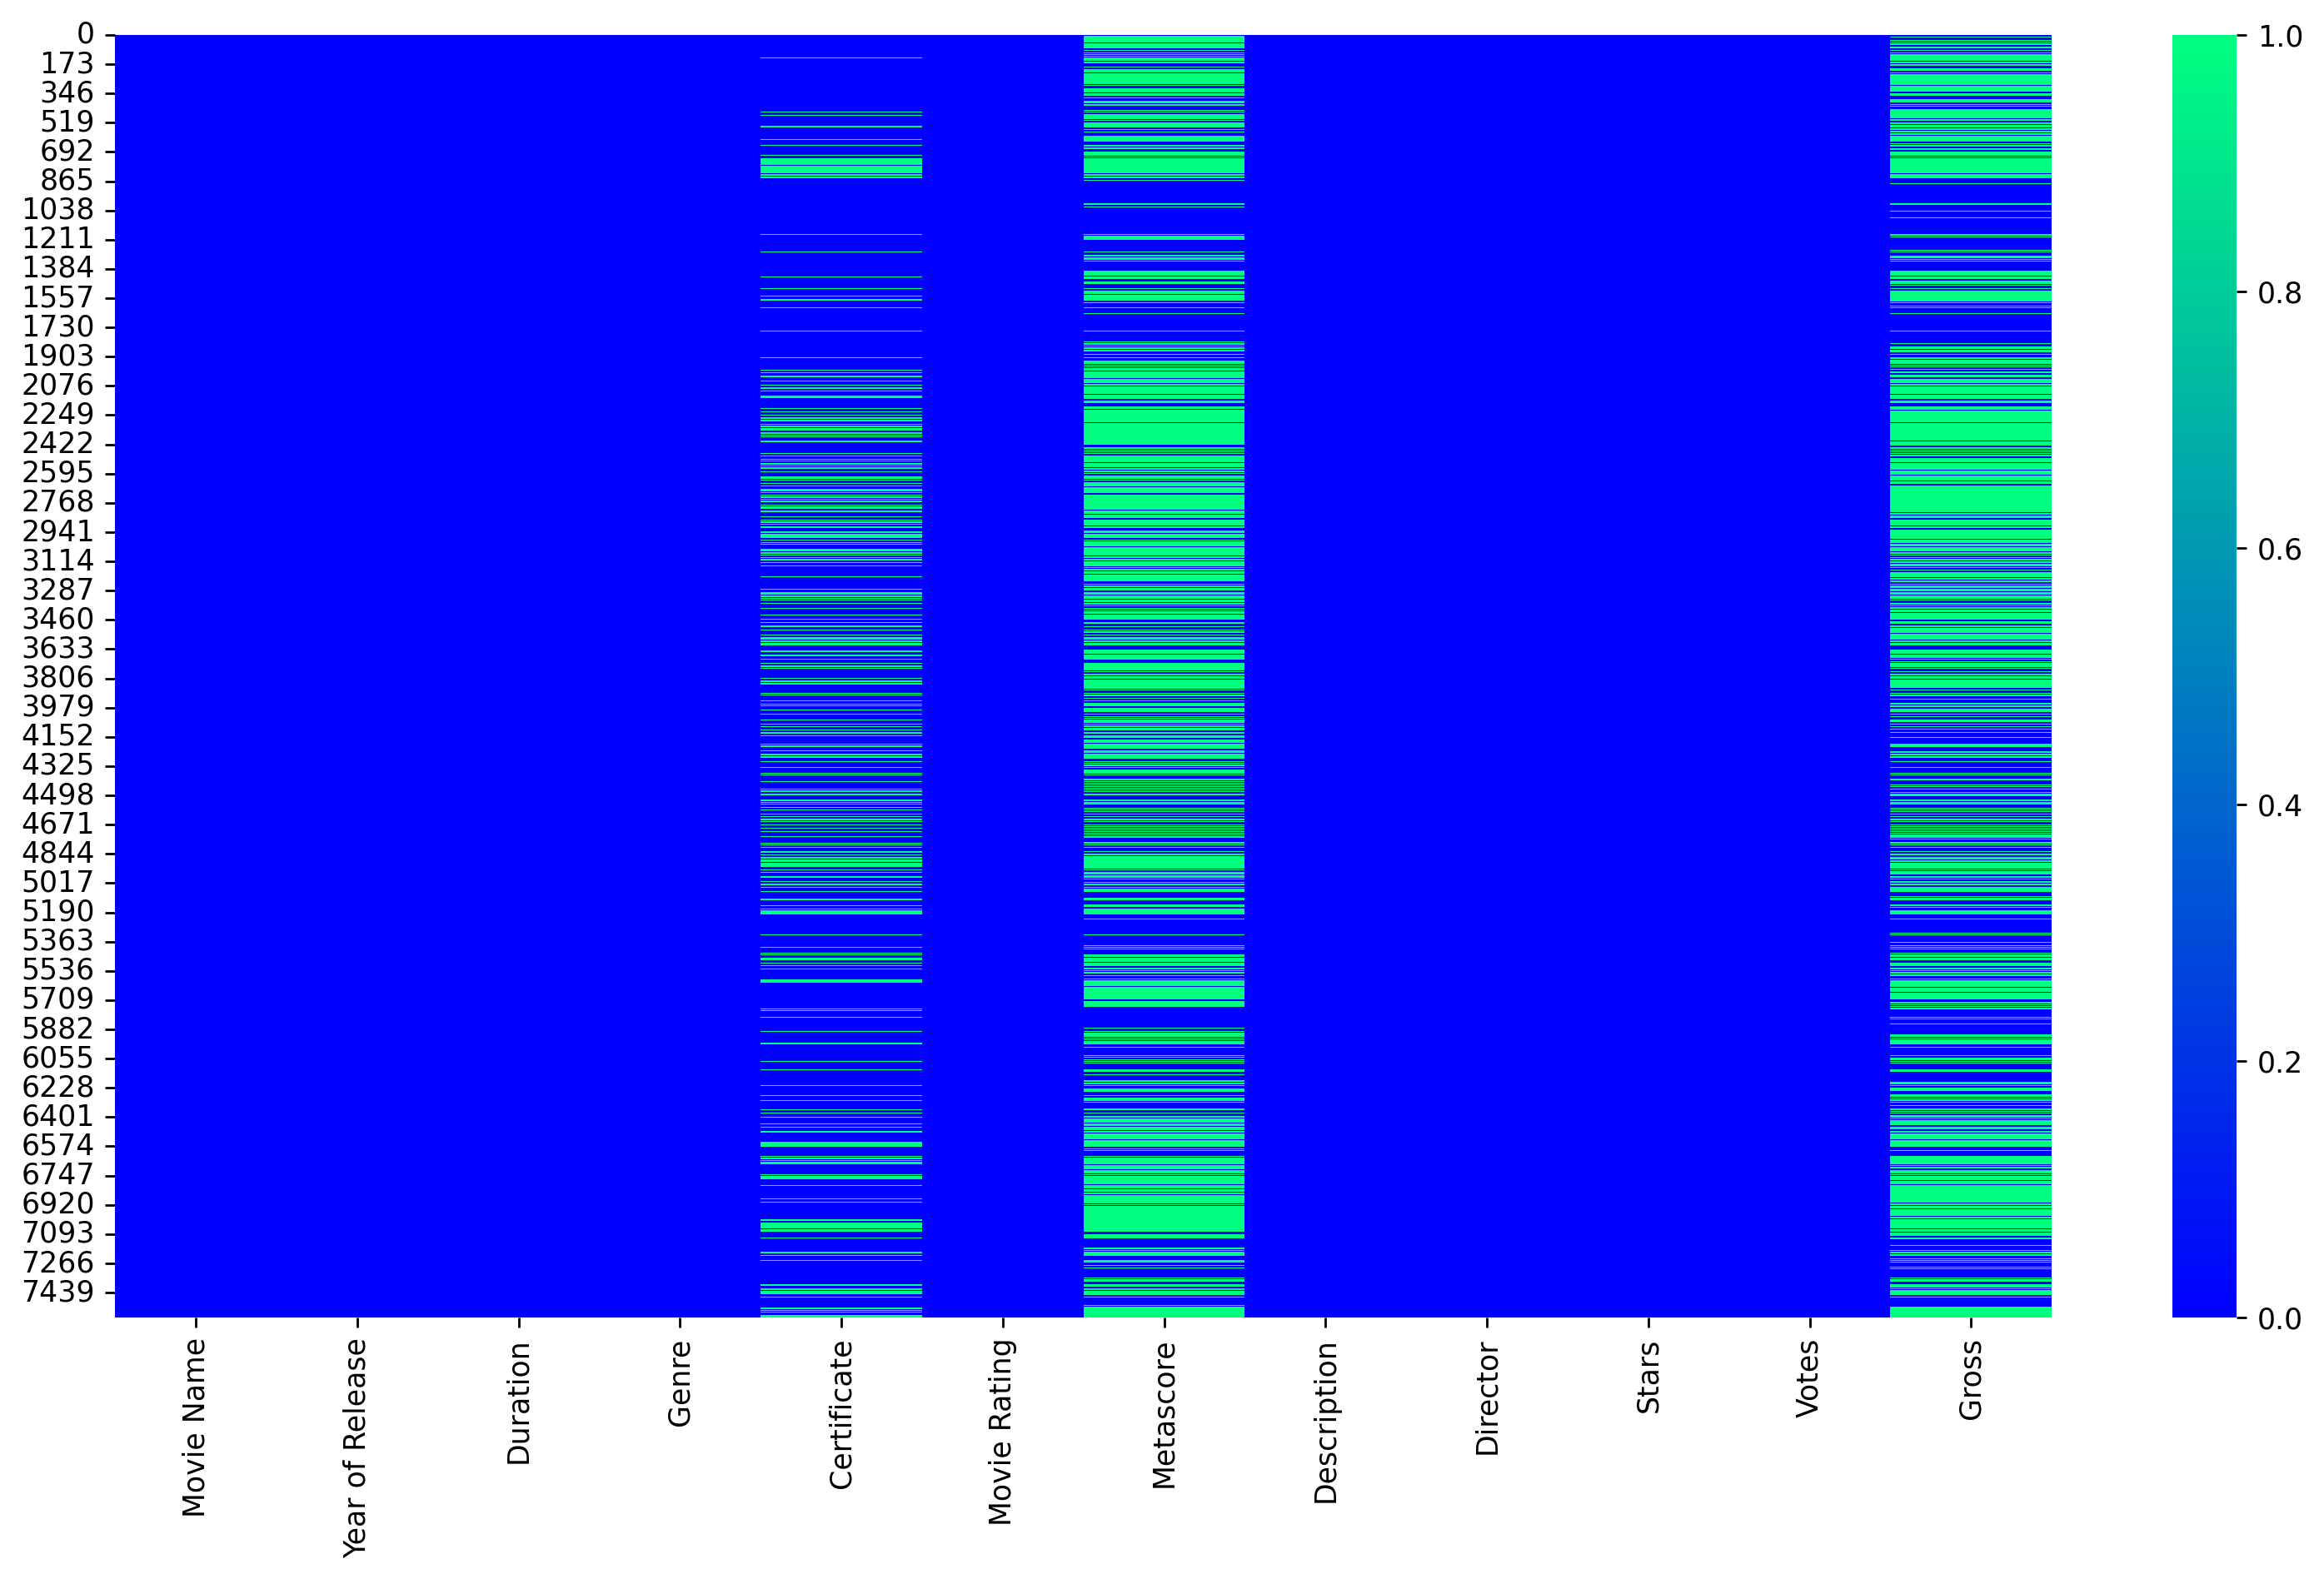

In [ ]:
#Visualizing Null values as a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap="winter") # 0- false,1-True



* here the light green shade indicate null values
* the blue shade indicates not null values



#8)Filling Null values

In [ ]:
#treating missing values
df.Gross.fillna(df.Gross.median(),inplace=True)
df.Certificate.fillna(df.Certificate.mode()[0],inplace=True)
df.Duration.fillna(df.Duration.mode()[0],inplace=True)
df.Genre.fillna(df.Genre.mode()[0],inplace=True)
df.Metascore.fillna(df.Metascore.median(),inplace=True)

In [ ]:
df.isnull().sum()

Movie Name         0
Year of Release    0
Duration           0
Genre              0
Certificate        0
Movie Rating       0
Metascore          0
Description        0
Director           0
Stars              0
Votes              0
Gross              0
dtype: int64

so, there are no null values in our dataset

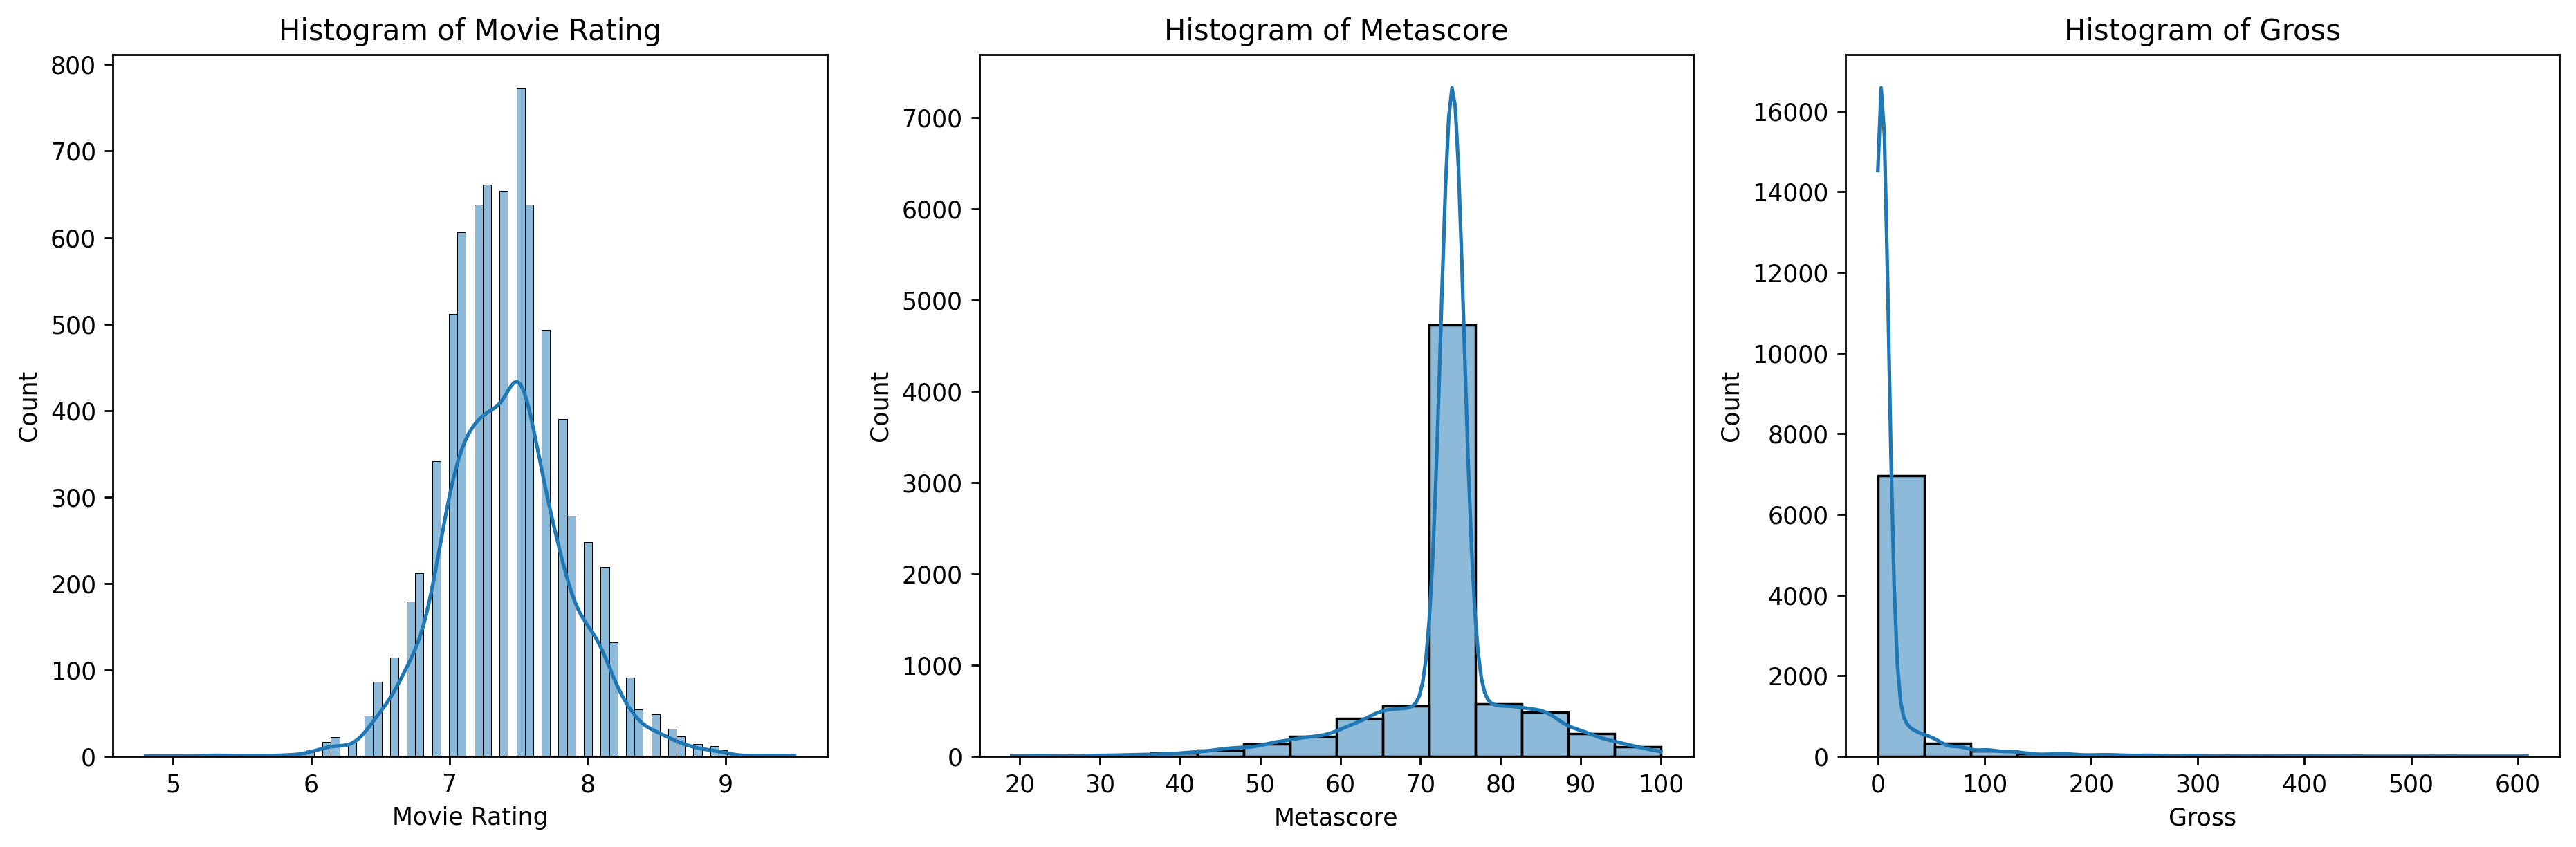

In [ ]:
numerical_features = ['Movie Rating', 'Metascore','Gross']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout();



* from above graph we can say that the Movie Rating is normally distributed

* Metascore is a bit left skewed
* Gross is completely right skewed




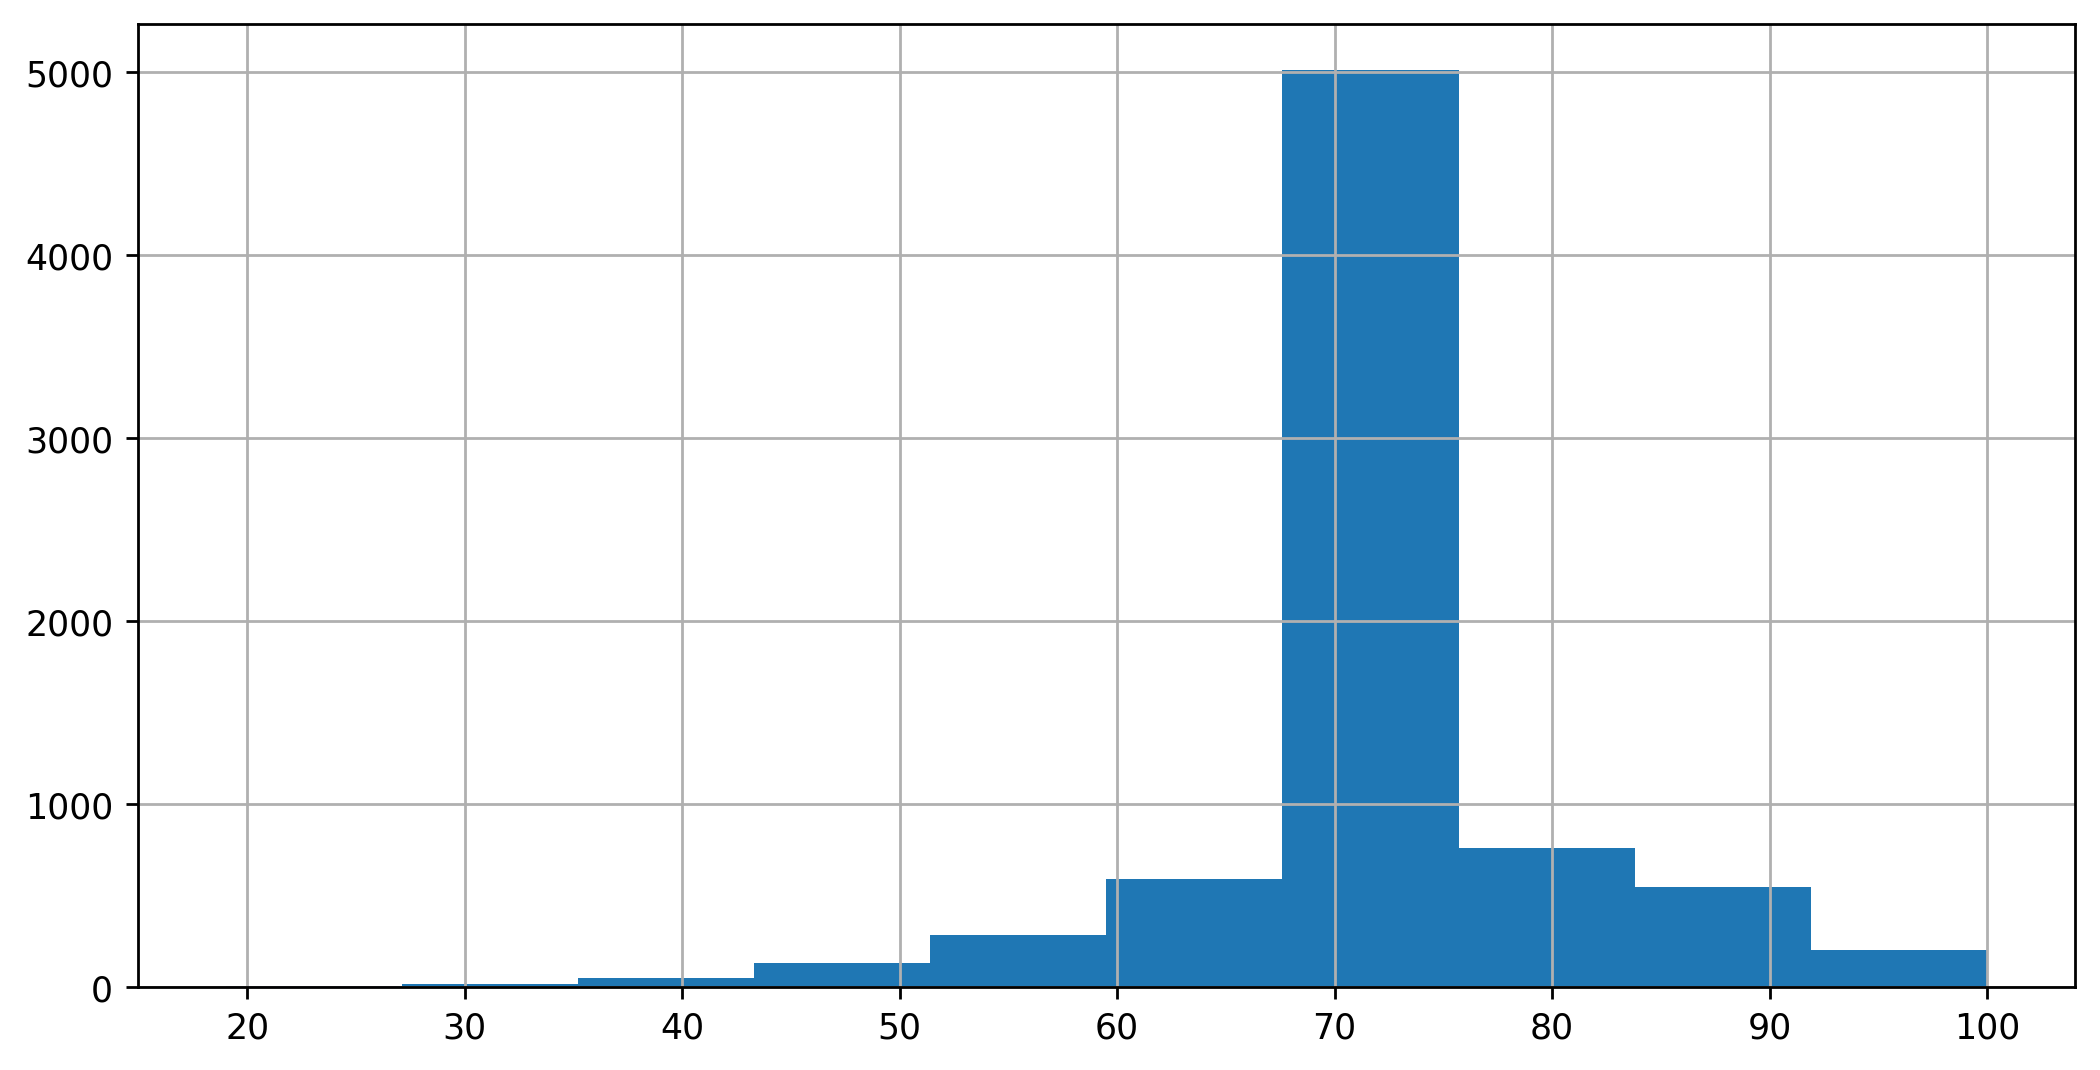

In [ ]:
df.Metascore.hist();



*   from the above hist plot we can see that there are outliers present
*  the metascore is having left-skewed distribution

*  the outliers are present in the lower quartil






In [ ]:
df.Metascore.skew()

-0.9319818841668401



*  we can see that the it's showing negative value ,so it's left skewed
* we can replace the Nan values with median value of the metascore



#9)text preprocessing

In [ ]:
# Assuming df is your DataFrame and 'directors' is the column containing the data
df['Director'] = df['Director'].str.replace(r'[\'\[\]]', '', regex=True)

In [ ]:
import re
def remove_symbols(text):
    return re.sub(r'[^\w\s]', '', text)

In [ ]:
# df["Year of Release"] =df["Year of Release"].apply(lambda x: str(x).replace("TV movie","").replace("-",""))
df["Year of Release"] =df["Year of Release"].apply(remove_symbols)

In [ ]:
# df["Duration"] = df["Duration"].apply(lambda x: str(x).replace(",",""))
df["Duration"] = df["Duration"].apply(remove_symbols)

In [ ]:
# Remove inverted commas, commas, and brackets from the "Stars" column
df['Stars'] = df['Stars'].astype(str).str.replace(r'[\'\[\],]','', regex=True)
df["Stars"] = df["Stars"].apply(lambda x: x.replace(" ", "").replace(","," "))
df["Stars"] = df["Stars"].apply(remove_symbols)

In [ ]:
# df["Votes"] = df["Votes"].apply(lambda x: str(x).replace(",", ""))
df["Votes"] = df["Votes"].apply(remove_symbols)

In [ ]:
# Remove commas from the 'Genre' column
df['Genre'] = df['Genre'].str.replace(',', '')

In [ ]:
df['Description'] =df['Description'].str.replace(',', '').str.replace("'", "")

In [ ]:
df.head(3)

,Movie Name,Year of Release,Duration,Genre,Certificate,Movie Rating,Metascore,Description,Director,Stars,Votes,Gross
0,A Trip to the Moon,1902,13,Short Action Adventure,TV-G,8.2,74.0,A group of astronomers go on an expedition to ...,Georges Méliès,GeorgesMélièsVictorAndréBleuetteBernonBrunnet,54487,4.0
1,The Great Train Robbery,1903,11,Short Action Adventure,TV-G,7.3,74.0,A group of bandits stage a brazen train hold-u...,Edwin S. Porter,GilbertMBronchoBillyAndersonACAbadieGeorgeBarn...,20603,4.0
2,Les vampires,1915,421,Action Adventure Crime,Not Rated,7.3,74.0,An intrepid reporter and his loyal friend batt...,Louis Feuillade,MusidoraÉdouardMathéMarcelLévesqueJeanAymé,5331,4.0


#10)some questions for visualisation

#In which year more movies released?

In [ ]:
released_years = df['Year of Release'].value_counts().head(10)
released_years

2004-01-01    138
2007-01-01    135
2002-01-01    128
2010-01-01    125
2000-01-01    125
Name: Year of Release, dtype: int64

#	Who are the top 5 directors and stars based on the average rating of their movies?

In [ ]:
# Group by 'Director' and calculate the average rating for each director
avg_rating_directors = df.groupby('Director')['Movie Rating'].mean()
top_directors = avg_rating_directors.nlargest(5)
top_directors.head()

Director
scott grimes, damian lewis, ron livingston            9.400000
amitabh reza chowdhury                                9.000000
petar lalovic                                         8.966667
artur barcis, olgierd lukaszewicz, olaf lubaszenko    8.900000
ezra edelman                                          8.900000
Name: Movie Rating, dtype: float64

In [ ]:
# Group by 'Stars' and calculate the average rating for each star
avg_rating_stars = df.groupby('Stars')['Movie Rating'].mean()

top_stars = avg_rating_stars.nlargest(5)
top_stars.head()

Stars
petar kralj                                             9.5
shane taylor                                            9.4
zoran radmilovic                                        9.4
tim robbins morgan freeman bob gunton william sadler    9.3
kemal sunal münir özkul halit akçatepe tarik akan       9.2
Name: Movie Rating, dtype: float64

#How many movies are there in top 5 genre?

In [ ]:
# Use value_counts to count the number of movies in each genre
movies_per_genre = df['Genre'].value_counts()
movies_per_genre.head()

Drama                                 1125
Drama, Romance                         494
Comedy, Drama                          354
Comedy, Drama, Romance                 269
Comedy                                 225
Name: Genre, dtype: int64

In [ ]:
movies_per_genre = df[['Genre','Year of Release']].value_counts()
movies_per_genre.head()

Genre              Year of Release
Drama              2013               32
                   1963               23
                   1997               22
                   2002               22
                   2008               22
dtype: int64

# 11)Visualization

In [ ]:
pip install implicit

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import hex_to_rgb
from tqdm import tqdm

In [ ]:
#Function to plot value counts plots
def plot_value_counts_bar(data, col):
    '''
    data: Dataframe
    col: Name of the column to be plotted
    ----
    returns a plotly figure
    '''
    vc = pd.DataFrame(data[col].value_counts())
    vc['cat'] = vc.index
    fig = px.bar(vc, x='cat', y=col, color='cat', title=col)
    fig.update_layout()

    return fig
plot_value_counts_bar(df,'Genre')



* Here we can see from the movies that "Drama" Genre is the most popular genre of all time.

* we can observe a Exponential decay function ,also after "Drama Mystery Romance " the genre movies count has been saturated.

* Hence we can convey to the client to take "Drama Mystery romance " as the threshold and to emphasize more to the previous Genre as that can be used for recommendation for their Customers
plot_value_counts_bar(df,'Year of Release')

In [ ]:
plot_value_counts_bar(df,'Year of Release')



*  we can see from the above plot that the year 2004 had highest releases whereas the year 2015 had the least releases.




[Text(0, 0, '7.75'), Text(0, 0, '7.45975'), Text(0, 0, '7.28527'), Text(0, 0, '7.43352'), Text(0, 0, '7.19494'), Text(0, 0, '7.4608'), Text(0, 0, '7.43039'), Text(0, 0, '7.56538'), Text(0, 0, '7.4122'), Text(0, 0, '7.21105'), Text(0, 0, '7.3'), Text(0, 0, '7.46667'), Text(0, 0, '7.45882'), Text(0, 0, '7.5913'), Text(0, 0, '7.16667'), Text(0, 0, '7.53333'), Text(0, 0, '7.05217'), Text(0, 0, '8.3'), Text(0, 0, '7.2'), Text(0, 0, '6.62'), Text(0, 0, '8.35'), Text(0, 0, '7.2')]


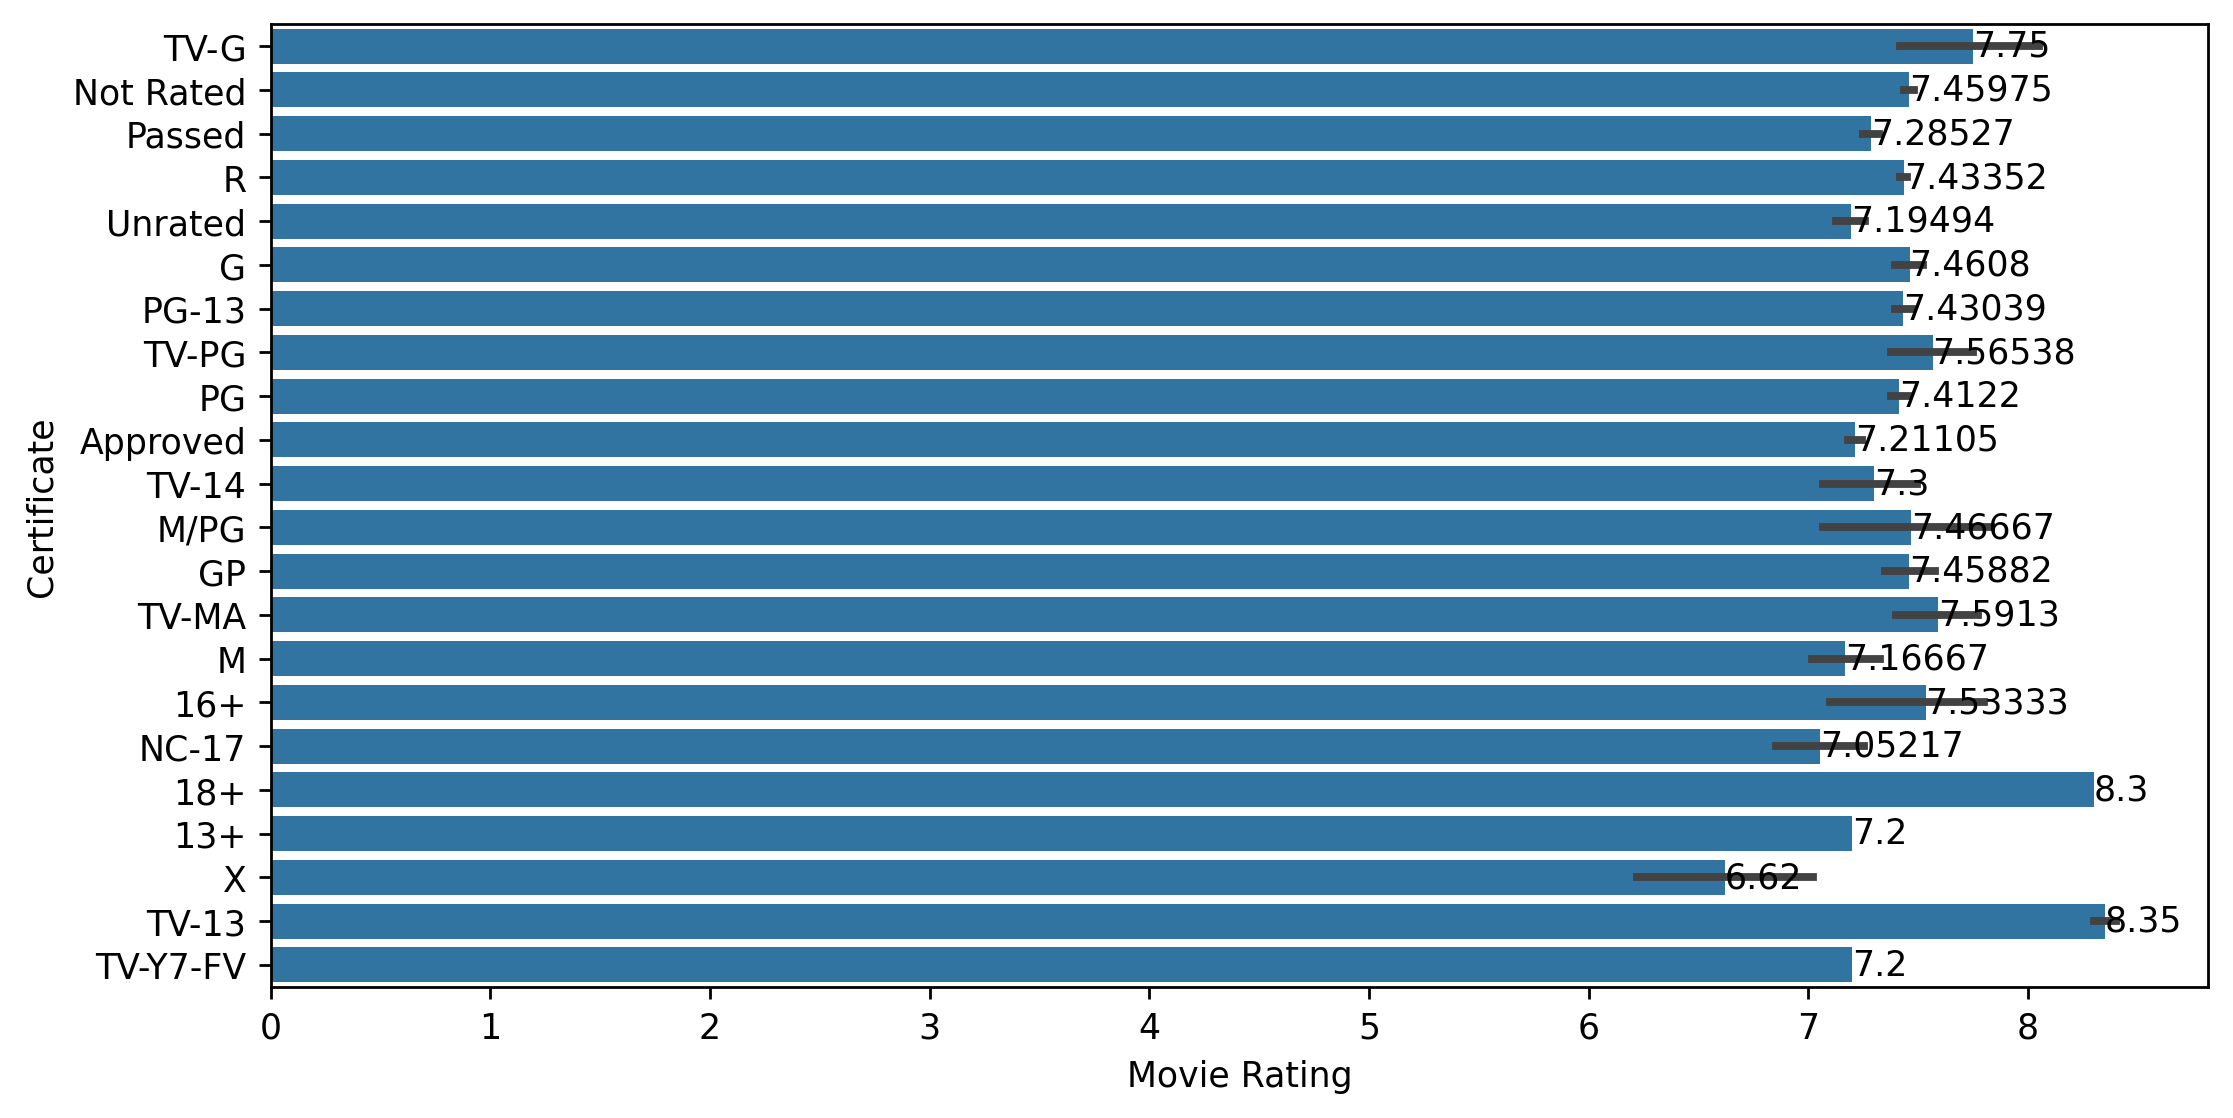

In [ ]:
ax = sns.barplot(data=df, x=df["Movie Rating"], y=df["Certificate"])
for container in ax.containers:
    print(ax.bar_label(container));



*  Here we can see that the certificate "X" was rated less with a rating of 6.62

*   the certificate"TV-13" was rated high when compared to other certificates ie with a rating of 8.35
*  we can suggest the client to recommend more "TV-13" certified series to the viewers

In [ ]:
df["Duration"] = df["Duration"].astype("int")

[Text(0, 0, '103.5'), Text(0, 0, '110.868'), Text(0, 0, '99.5788'), Text(0, 0, '110.98'), Text(0, 0, '110.438'), Text(0, 0, '106.693'), Text(0, 0, '117.26'), Text(0, 0, '113.769'), Text(0, 0, '111.782'), Text(0, 0, '104.146'), Text(0, 0, '109.286'), Text(0, 0, '110.333'), Text(0, 0, '124.029'), Text(0, 0, '169.043'), Text(0, 0, '116.167'), Text(0, 0, '106.667'), Text(0, 0, '115.391'), Text(0, 0, '170'), Text(0, 0, '98'), Text(0, 0, '105.8'), Text(0, 0, '85'), Text(0, 0, '80')]


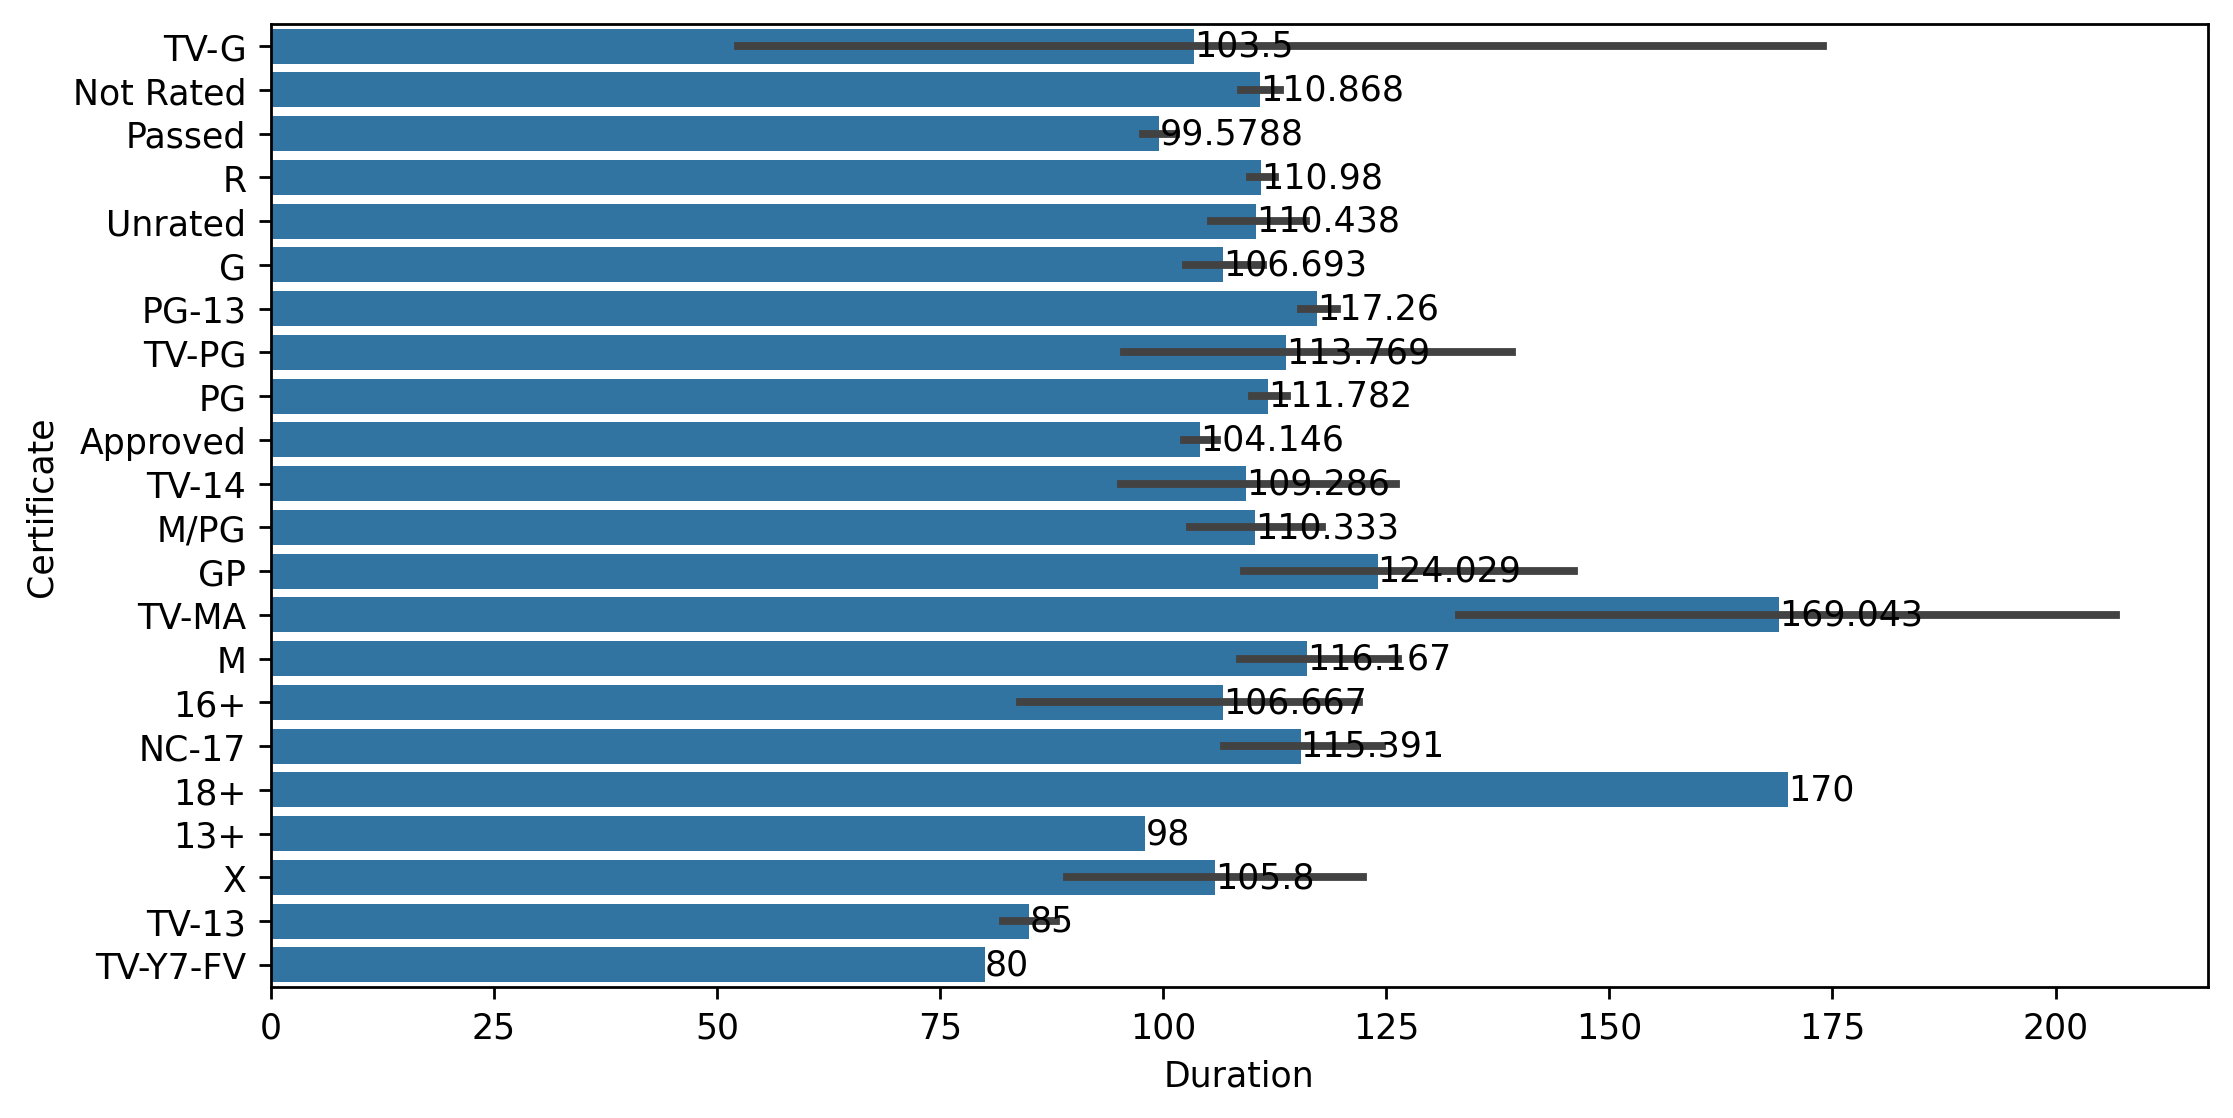

In [ ]:
ax = sns.barplot(data=df, x=df["Duration"], y=df["Certificate"])
for container in ax.containers:
    print(ax.bar_label(container));



*  here we can observe that "18+" certifications had higher duration when compared to other certification and also from the cert vs rating ,we can also observe that the "18+" also had a rating of 8.3.
*  hence from the two plots we can come to a conclusion that "18+" maybe rated higher because of its longer duration.



In [ ]:
plot_value_counts_bar(df,"Certificate")



* "R" rated is more than the rest of the other certificates.
* "TV-Y7-FV" is the least certificate made movies.
* Hence i would recommend the client to have more "R" rated movies than other certificated movies.

Enter y-axis label: Movie Name
Enter x-axis label: Gross


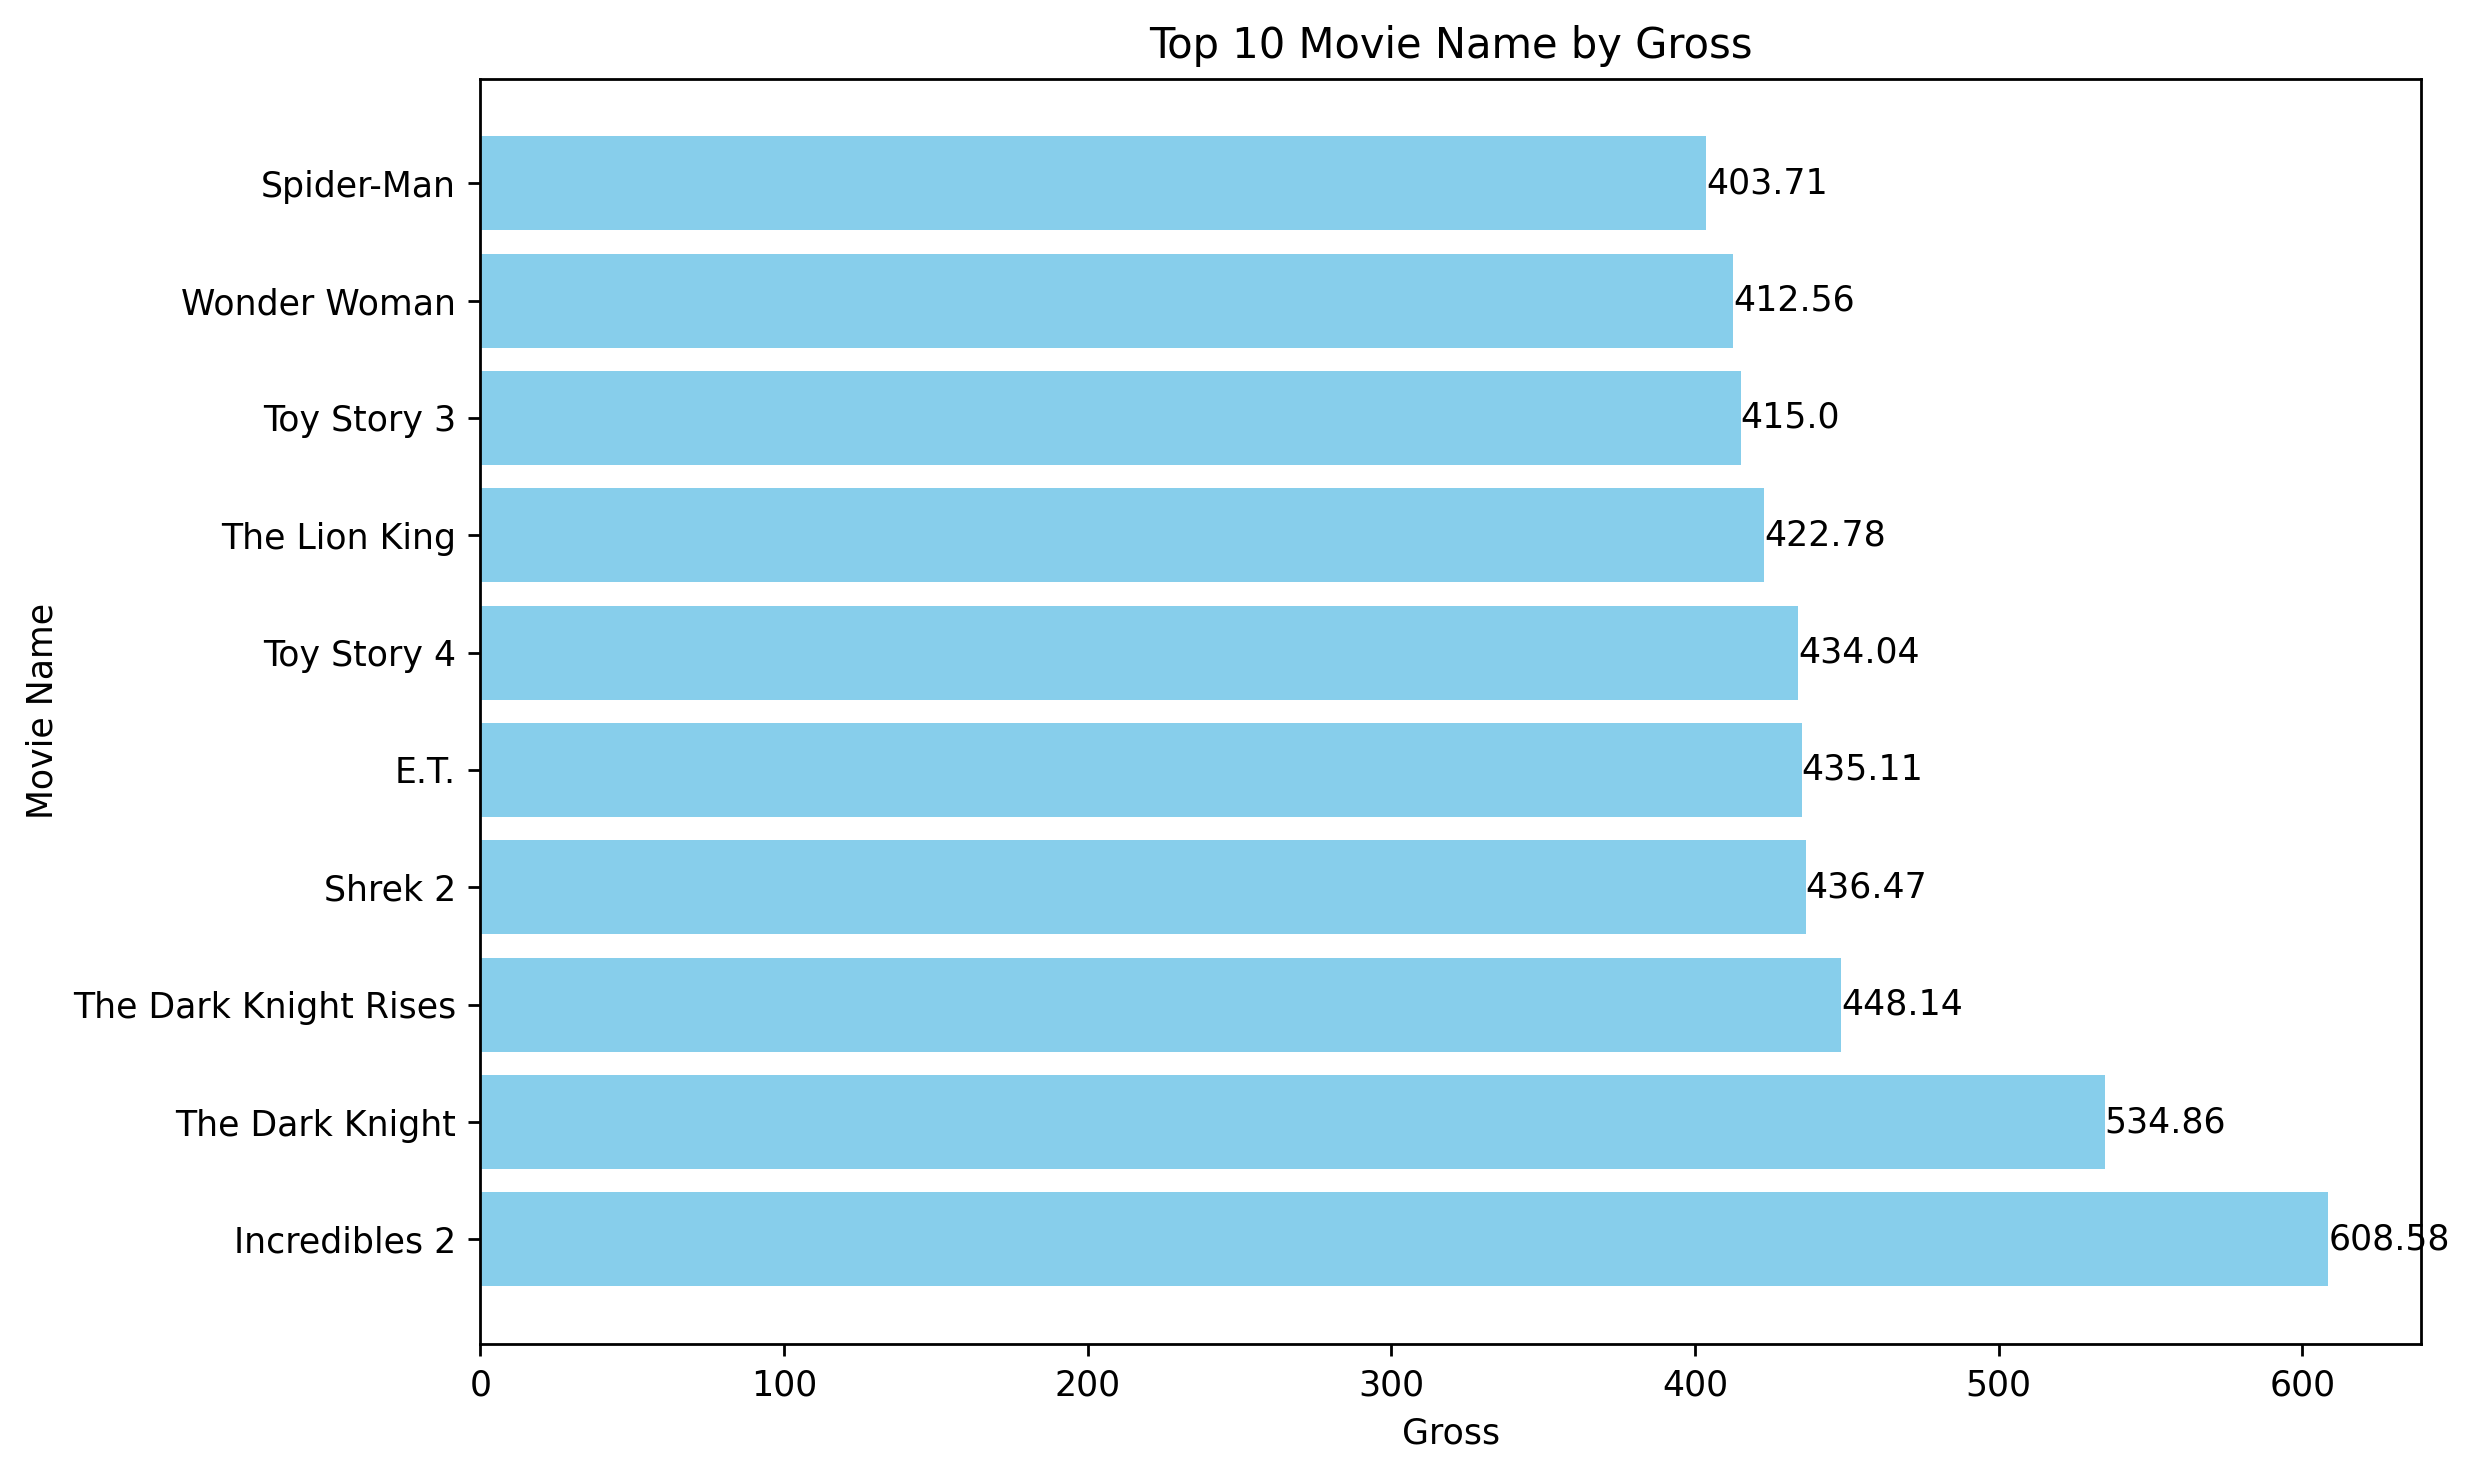

In [ ]:
def plot_top(data, col1, col2, top_n=10):
    df = data.sort_values(by=col2, ascending=False)
    top_movies = df.head(top_n)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_movies[col1], top_movies[col2], color='skyblue')
    plt.ylabel(input("Enter y-axis label: "))
    plt.xlabel(input("Enter x-axis label: "))
    plt.title(f'Top {top_n} {col1} by {col2}')
    for bar, value in zip(bars, top_movies[col2]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:,}', ha='left', va='center')
    plt.tight_layout()
    plt.show()

plot_top(df, 'Movie Name', 'Gross')


*   Incredibles 2 is the most grossed movie of all time with a value of 608.50
* we can observe from the above chart that the movies that are sci-fi has grossed the more





Enter y-axis label: Movie Name
Enter x-axis label: Movie Rating


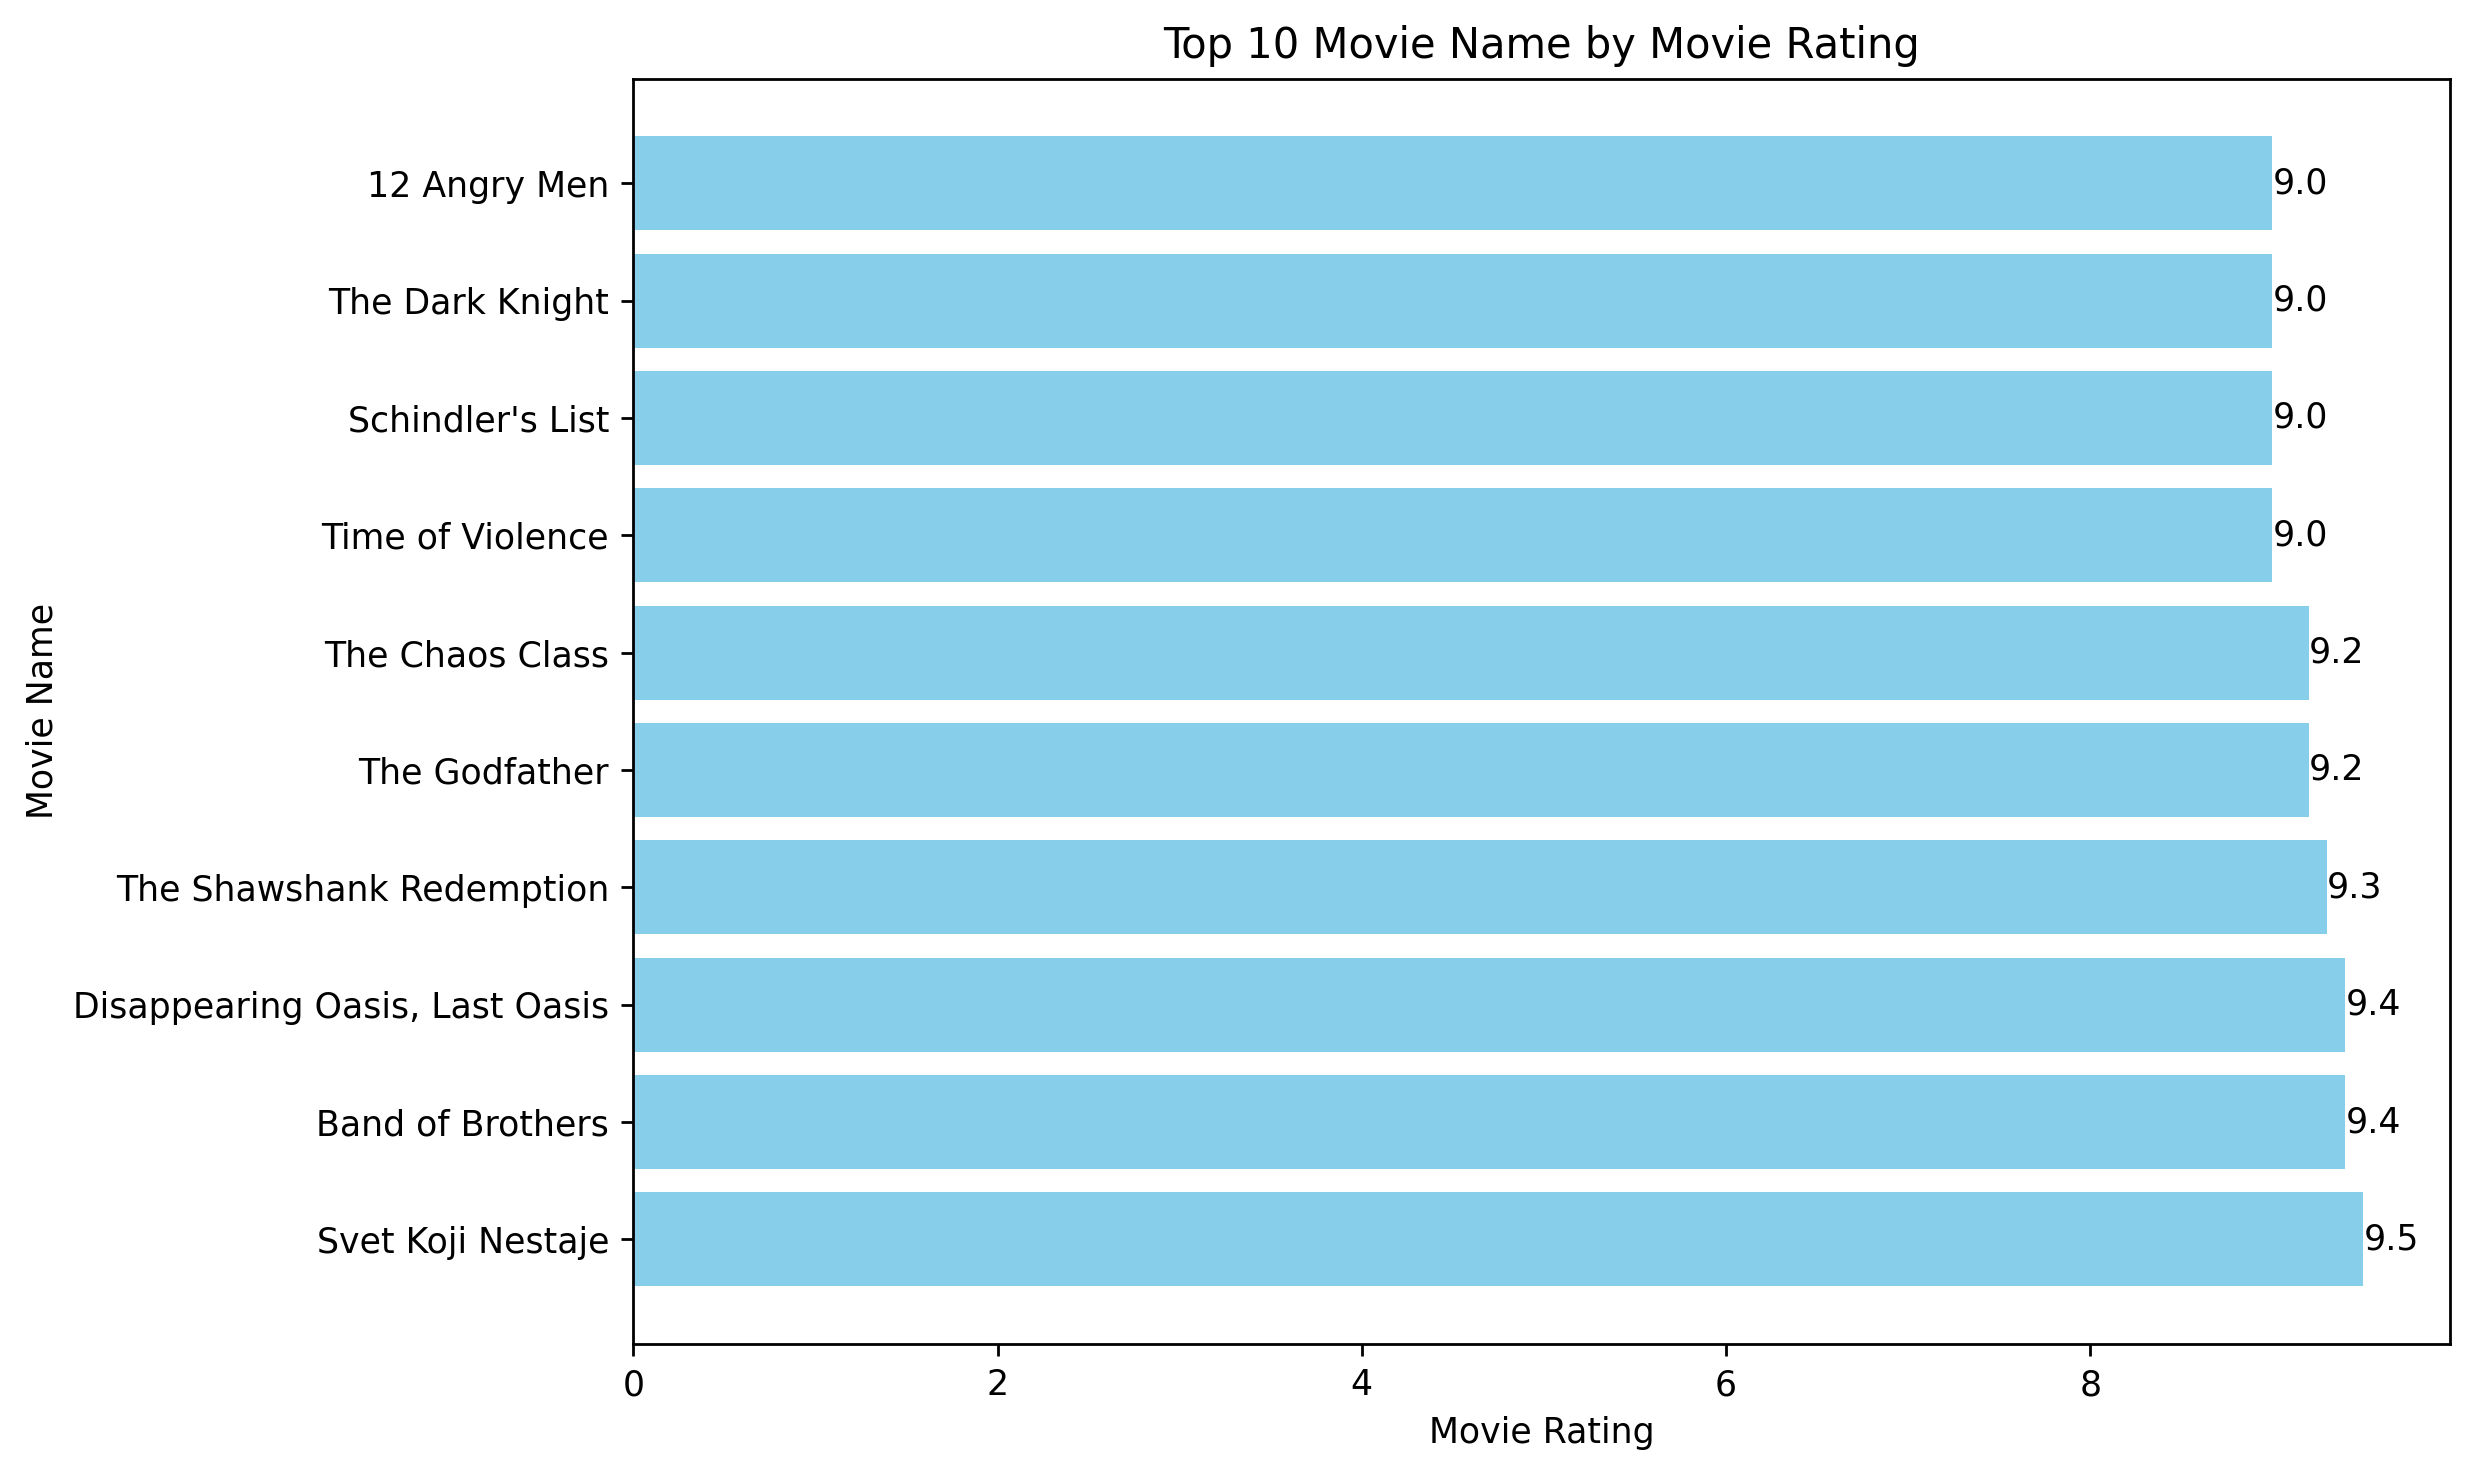

In [ ]:
plot_top(df, 'Movie Name', 'Movie Rating')

In [ ]:
df["Votes"] = df["Votes"].astype("int")

Enter y-axis label: Movie Name
Enter x-axis label: Votes


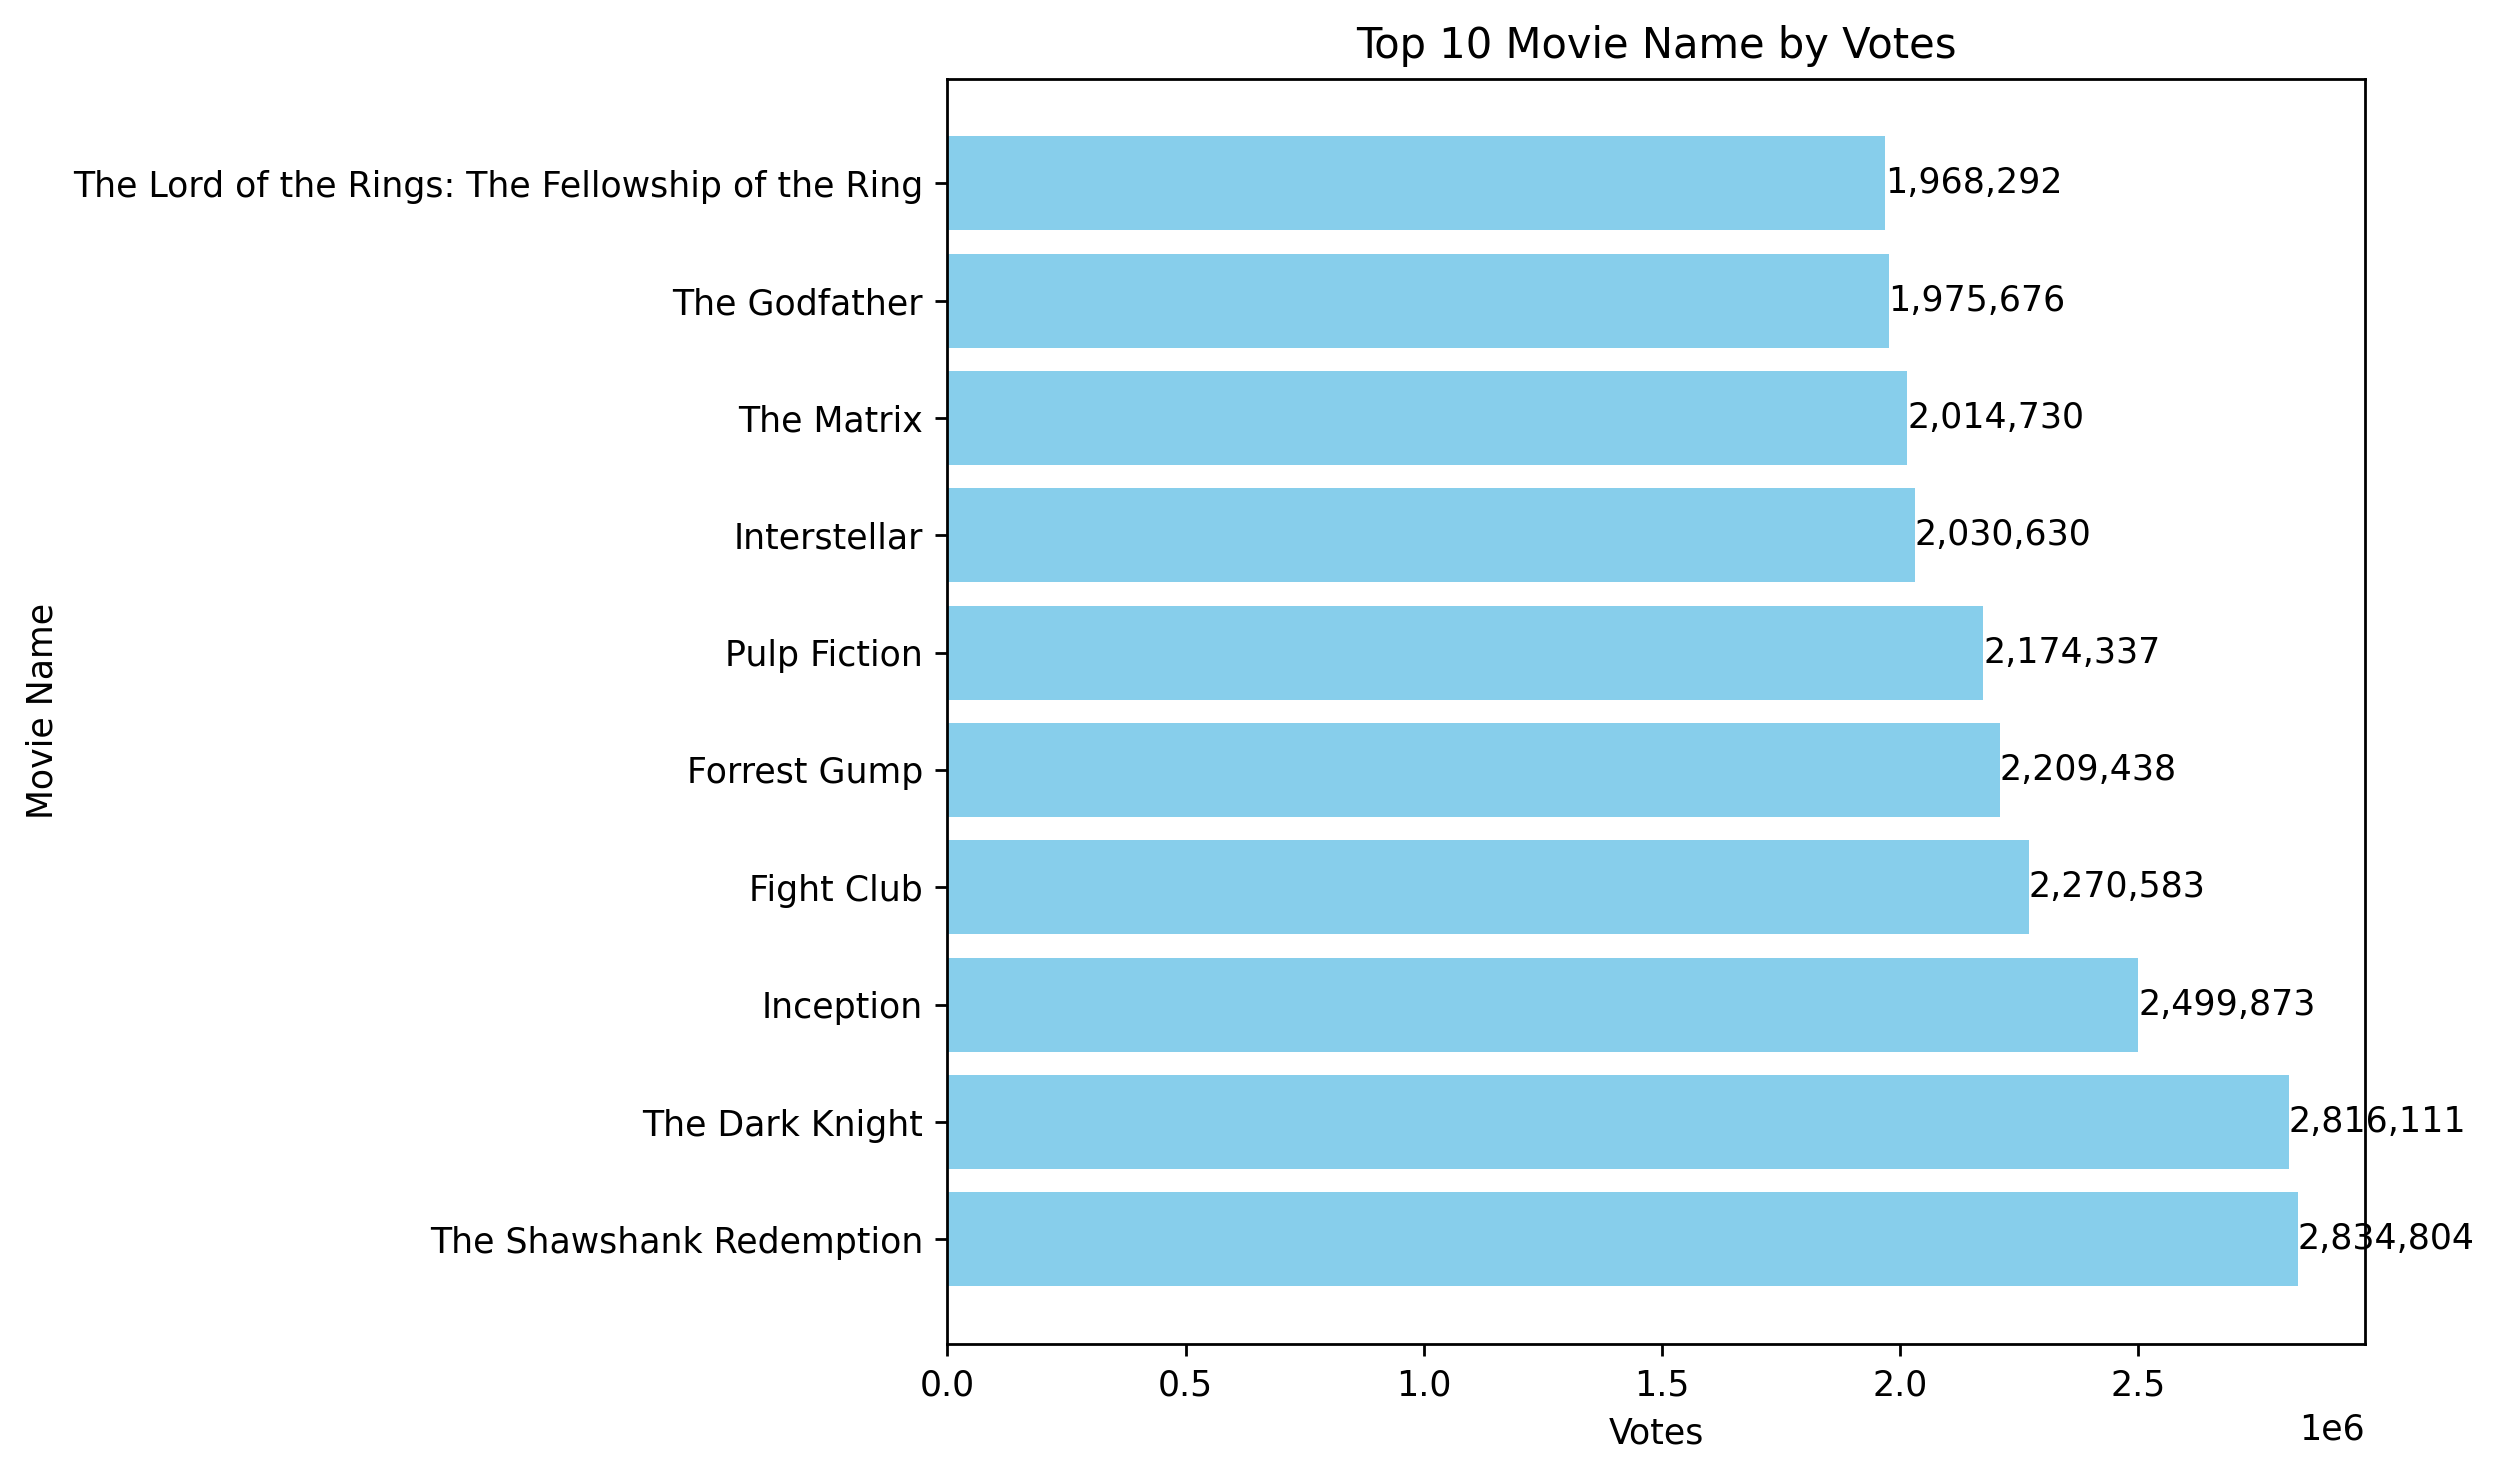

In [ ]:
plot_top(df, 'Movie Name', 'Votes')

Enter y-axis label: Director
Enter x-axis label: Votes


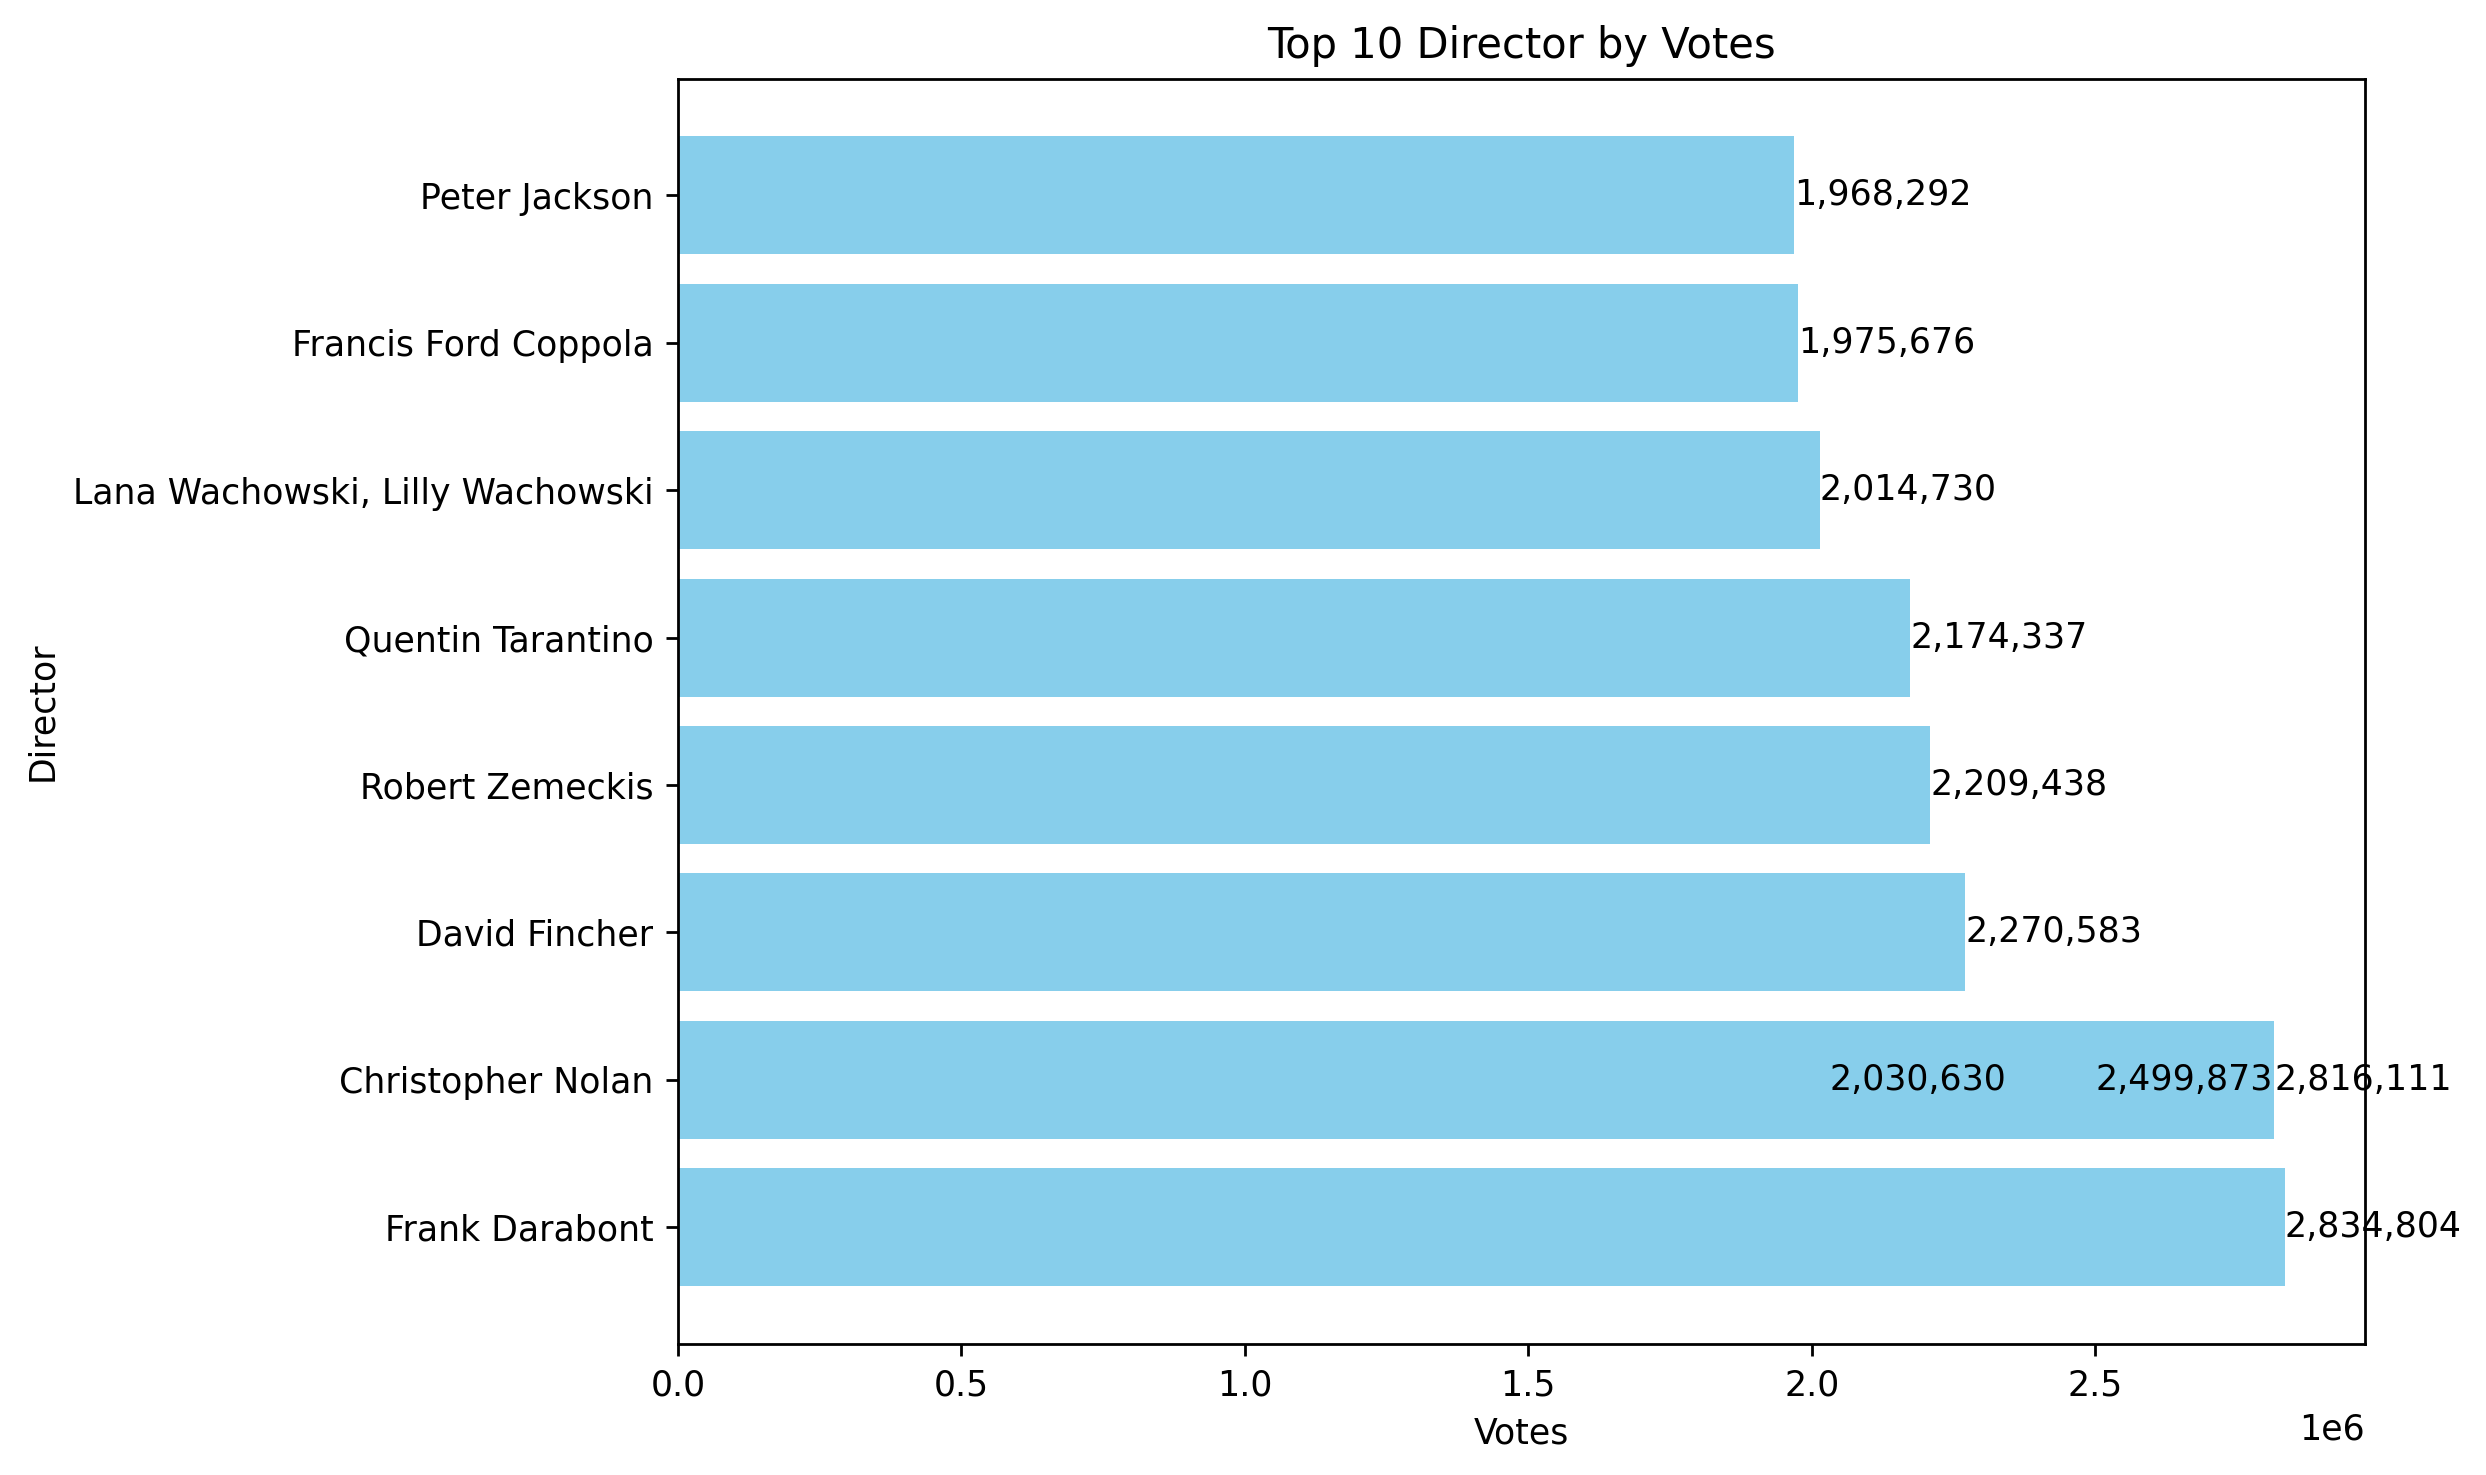

In [ ]:
plot_top(df, 'Director', 'Votes')

Enter y-axis label: Stars
Enter x-axis label: Votes


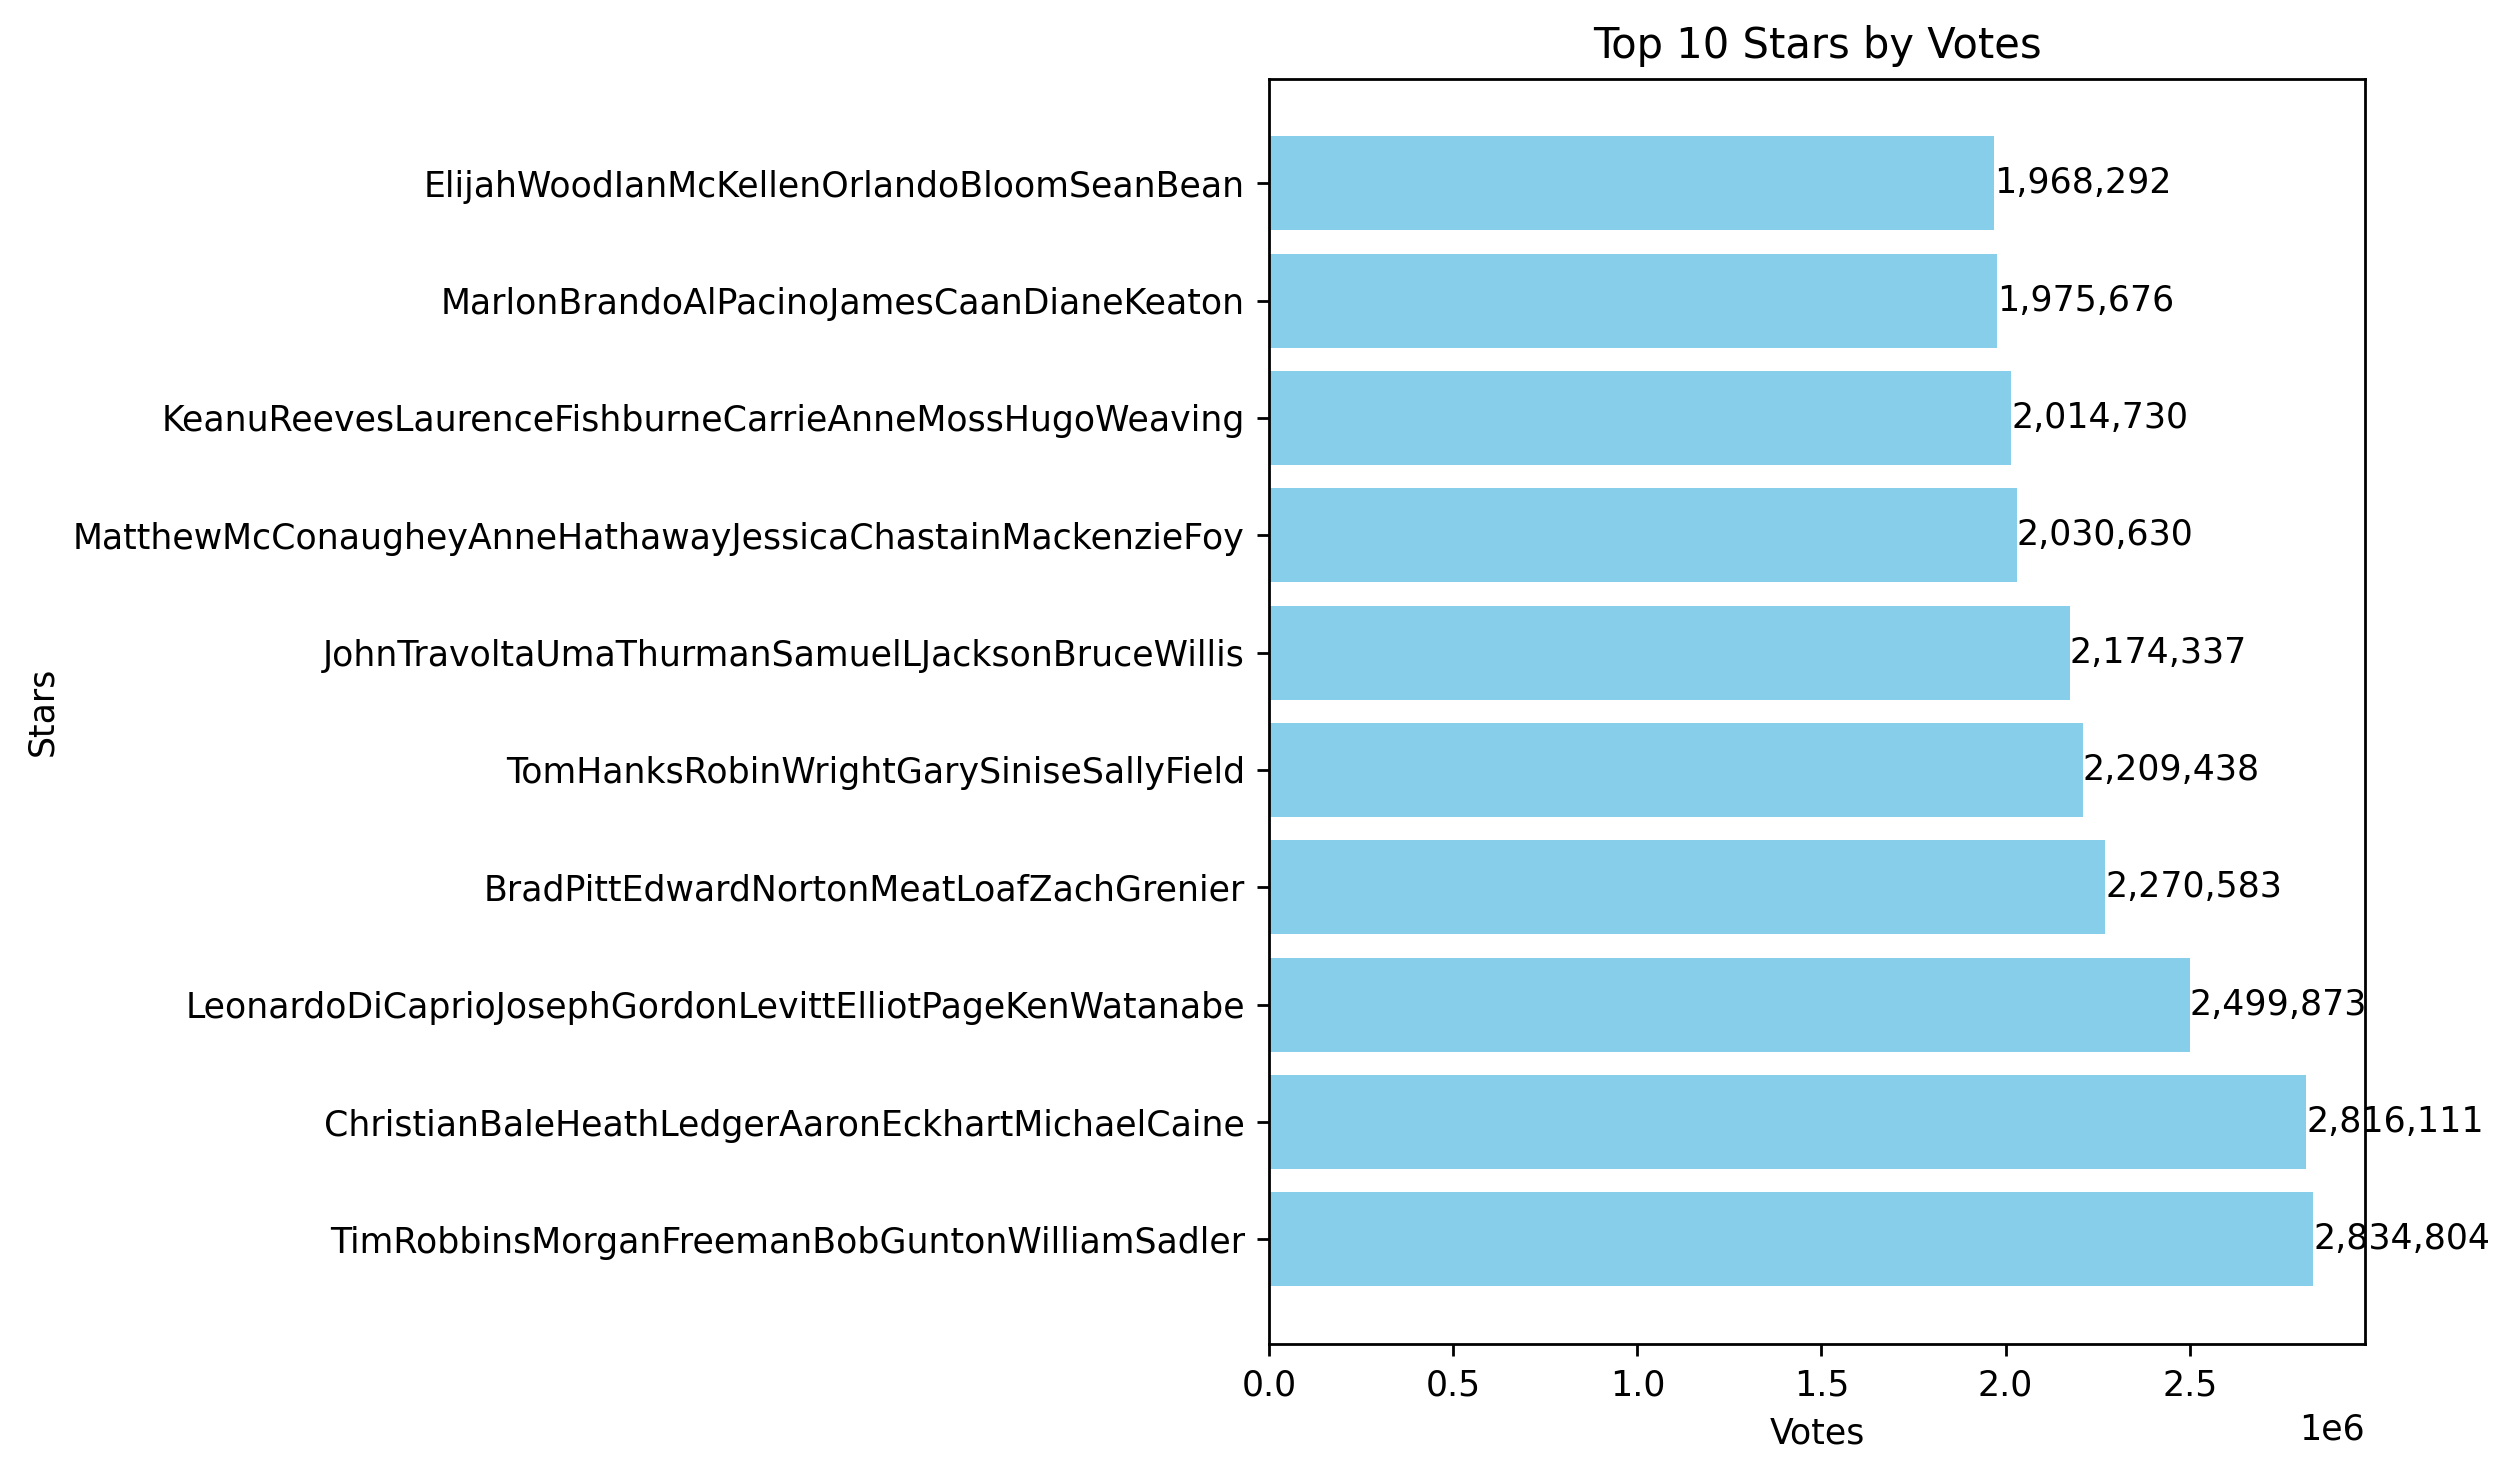

In [ ]:
plot_top(df, 'Stars', 'Votes')

Enter y-axis label: Director
Enter x-axis label: Gross


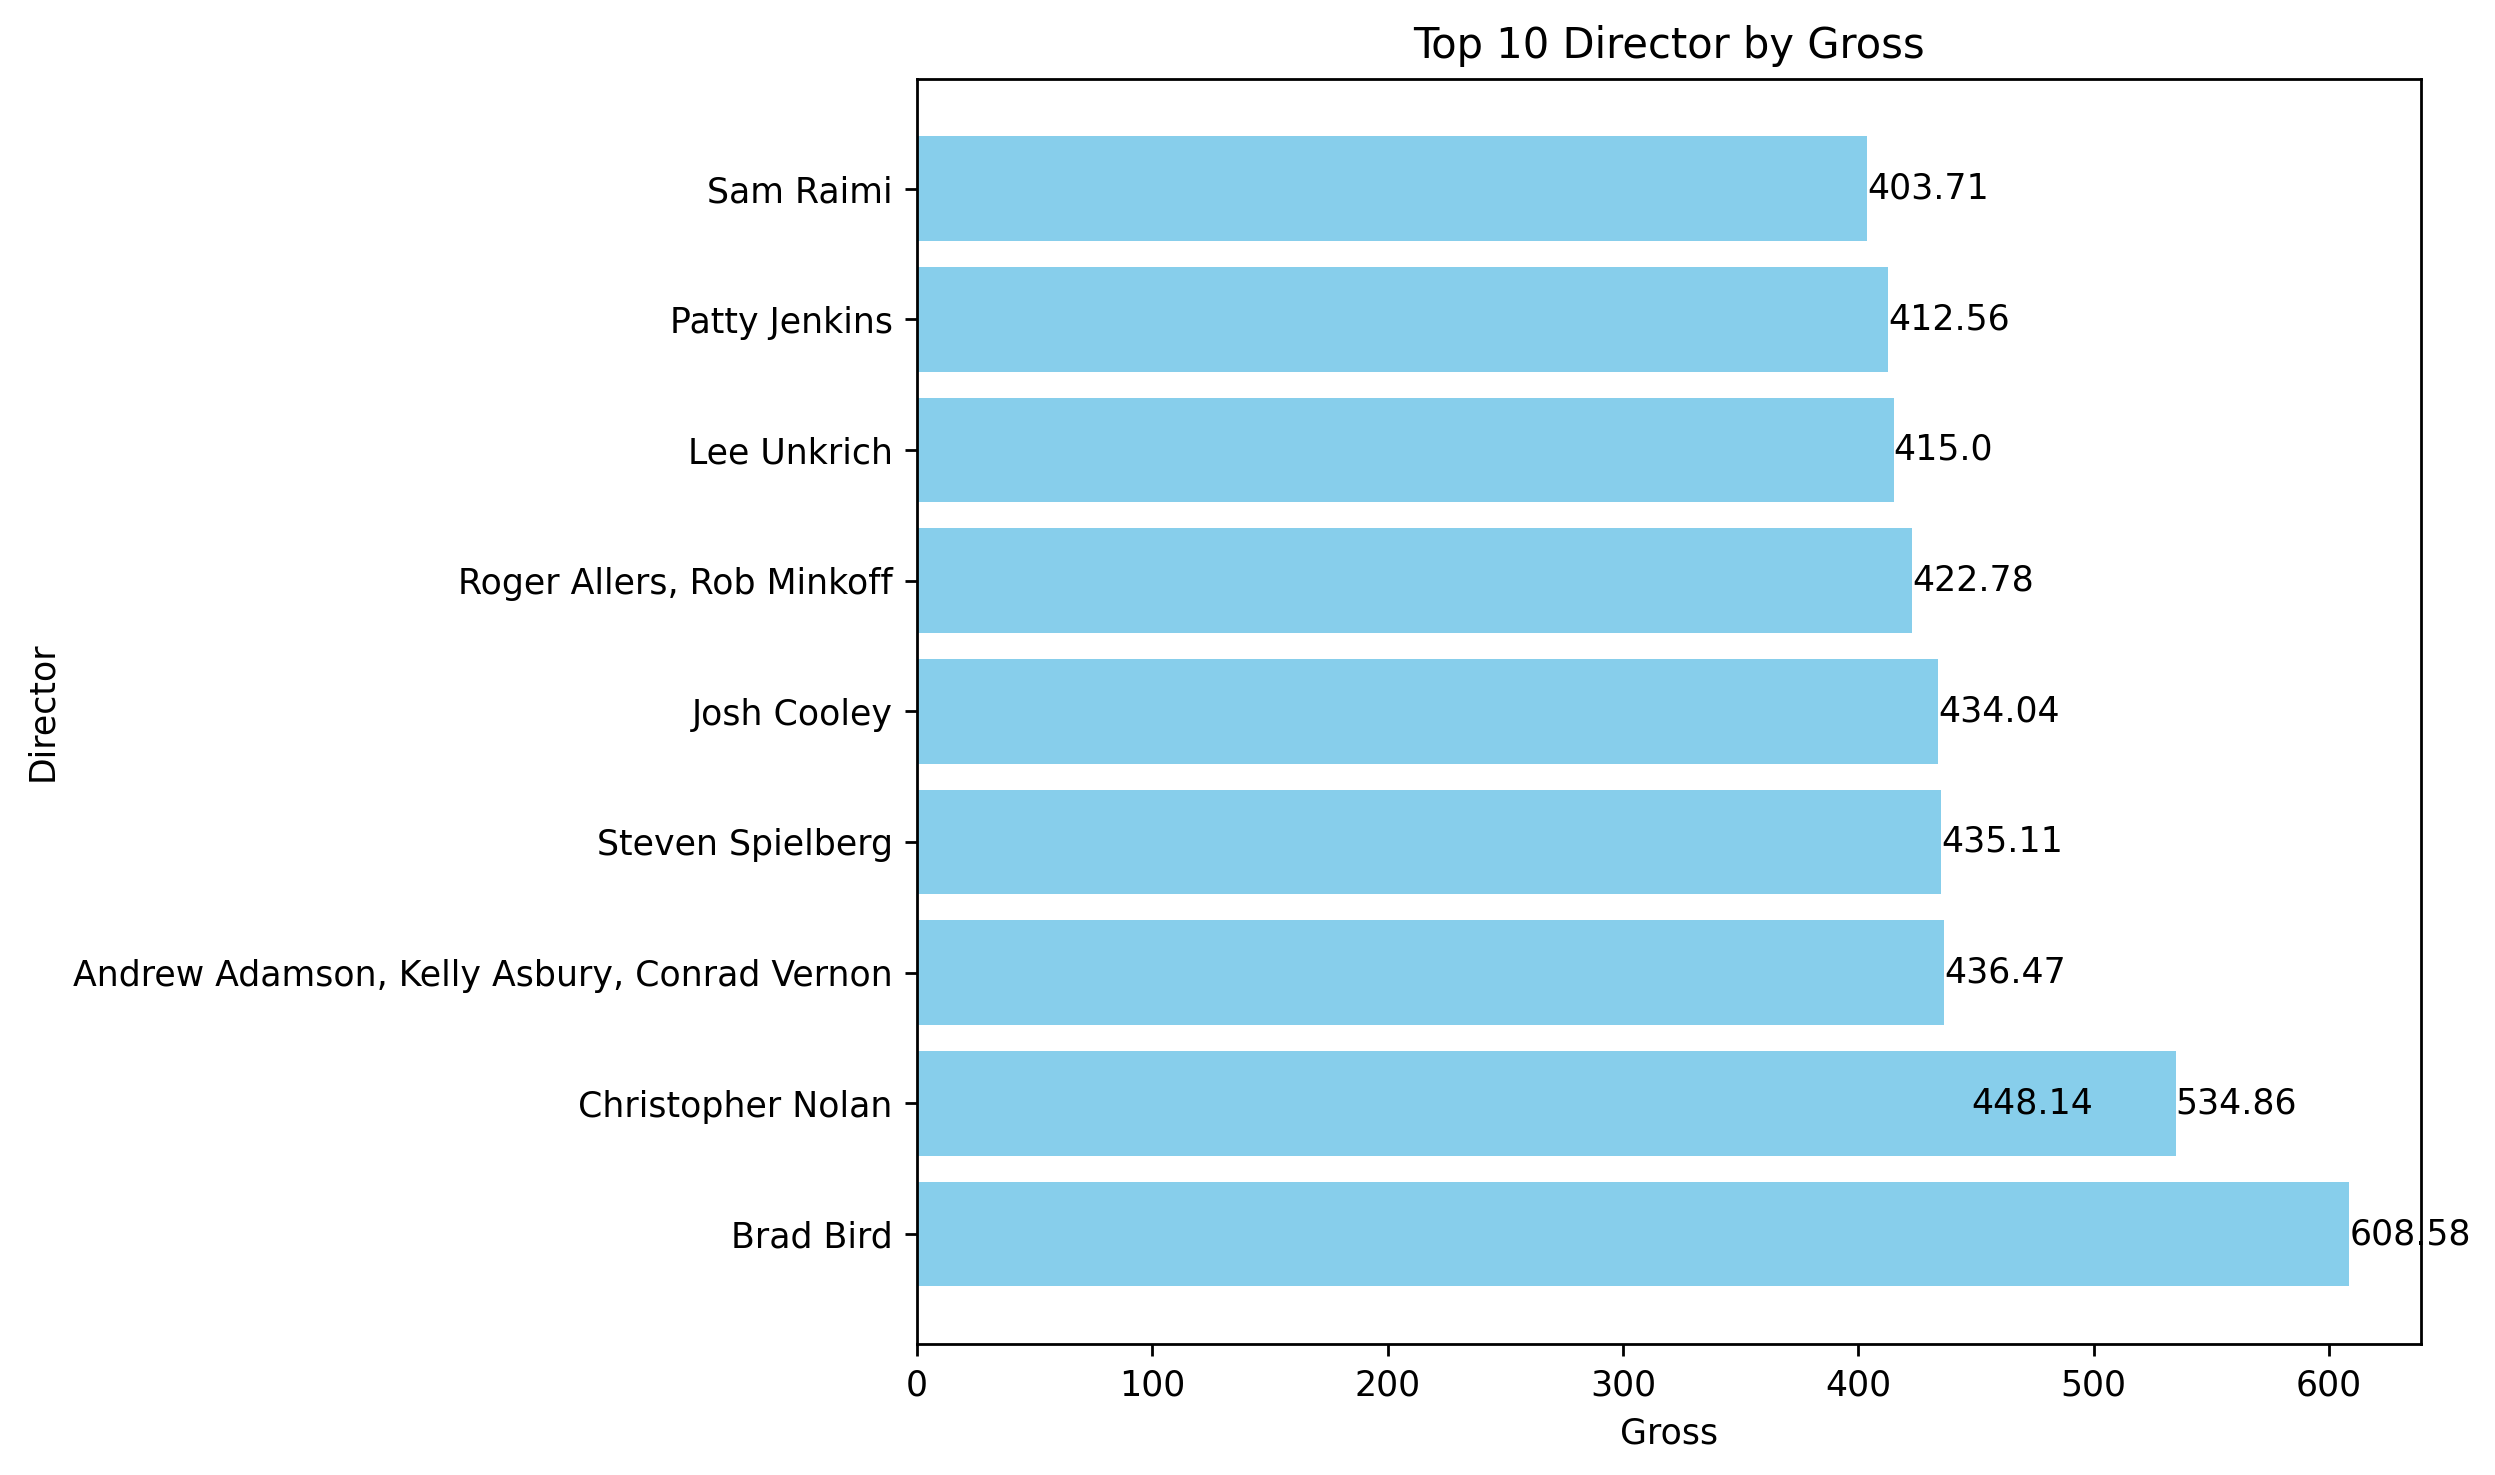

In [ ]:
plot_top(df, 'Director', 'Gross')

Enter y-axis label: Stars
Enter x-axis label: Gross


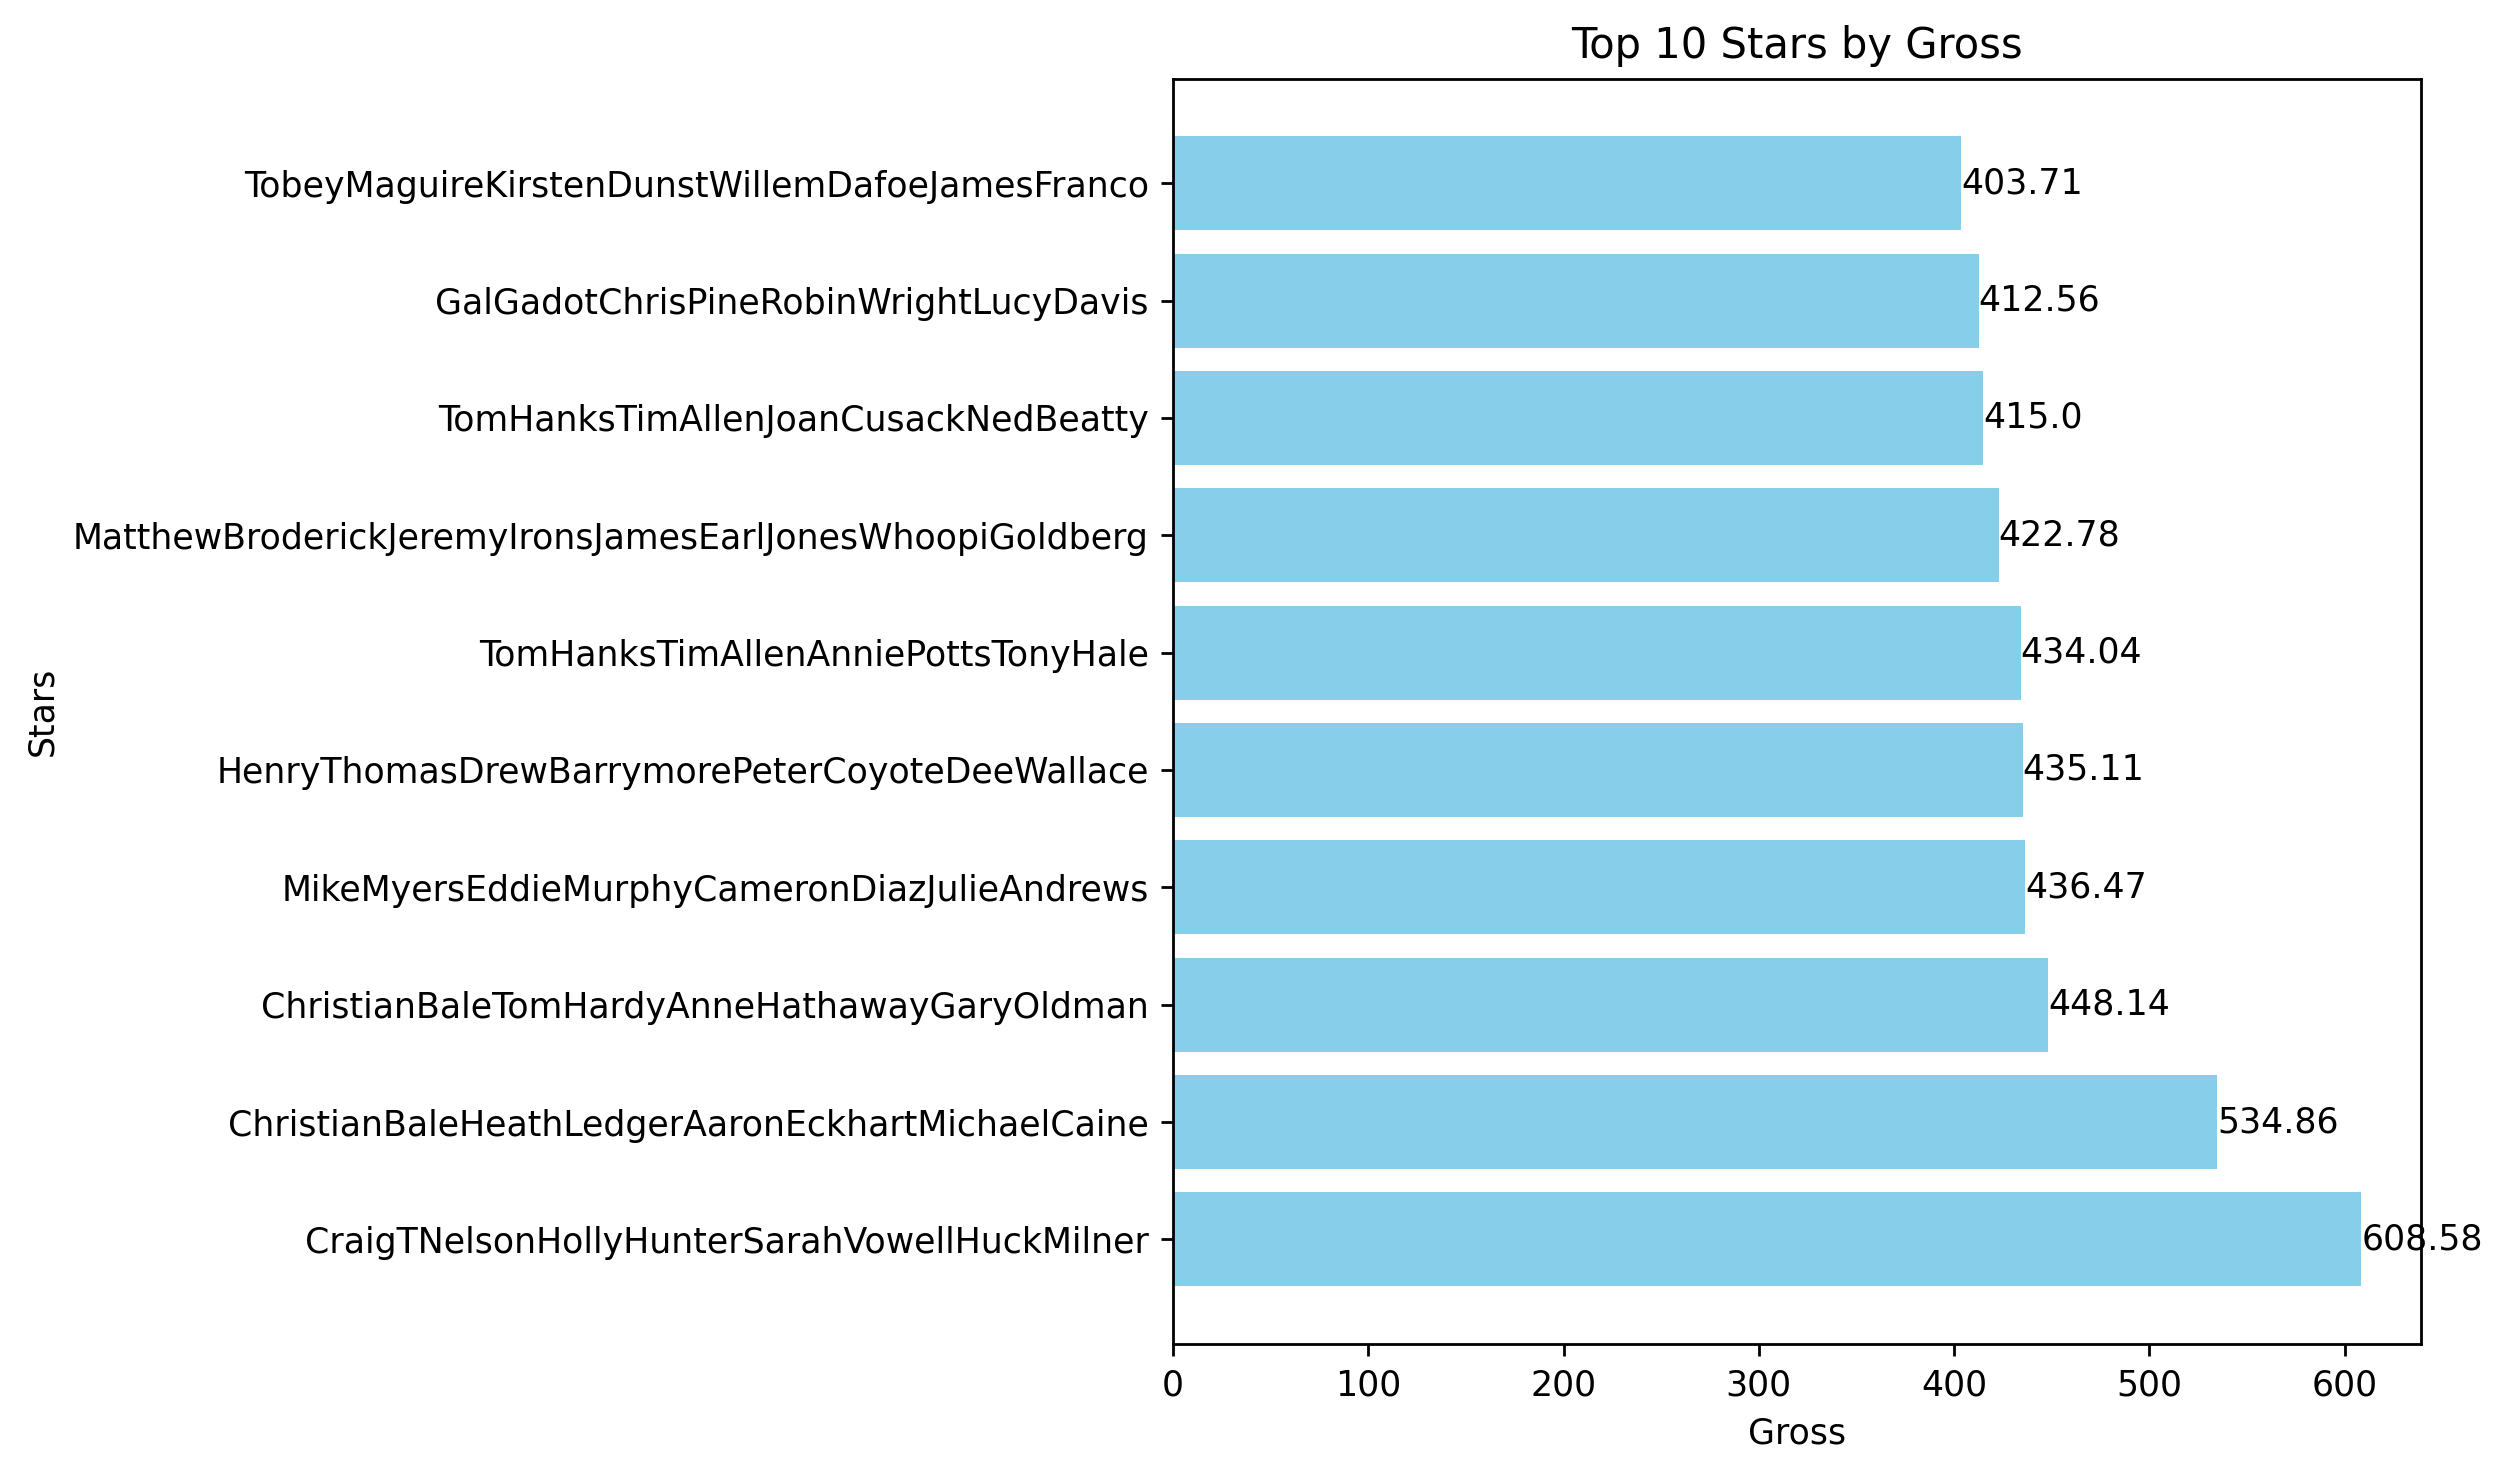

In [ ]:
plot_top(df, 'Stars', 'Gross')

#12)combining columns

In [ ]:
# selecting the relevant features for recommendation
selected_features = ['Genre','Director','Stars','Description']
print(selected_features)

['Genre', 'Director', 'Stars', 'Description']


In [ ]:
df["tags"]=df["Description"] +" "+ df["Genre"]+" " + df["Stars"] +" " + df["Director"]

In [ ]:
df["tags"]

0       A group of astronomers go on an expedition to ...
1       A group of bandits stage a brazen train hold-u...
2       An intrepid reporter and his loyal friend batt...
3       The story of a poor young woman separated by p...
4       A twelve-part serial following the adventures ...
                              ...                        
7581    After Dr. Friedrichs wife becomes mentally uns...
7582    A struggling mother of three forms an unexpect...
7583    A parody of Top Gun (1986) in which a talented...
7584    Justin Mollenard is a sailor and arms smuggler...
7585    Four men plan a technically perfect crime but ...
Name: tags, Length: 7586, dtype: object

In [ ]:
new_df = df[["Movie Name","Year of Release","tags"]]
new_df

,Movie Name,Year of Release,tags
0,A Trip to the Moon,1902,A group of astronomers go on an expedition to ...
1,The Great Train Robbery,1903,A group of bandits stage a brazen train hold-u...
2,Les vampires,1915,An intrepid reporter and his loyal friend batt...
3,Intolerance,1916,The story of a poor young woman separated by p...
4,Judex,1916,A twelve-part serial following the adventures ...
...,...,...,...
7581,Atlantis,1913,After Dr. Friedrichs wife becomes mentally uns...
7582,Tully,2018,A struggling mother of three forms an unexpect...
7583,Hot Shots!,1991,A parody of Top Gun (1986) in which a talented...
7584,Hatred,1938,Justin Mollenard is a sailor and arms smuggler...


In [ ]:
new_df["tags"] =  new_df["tags"].apply(lambda x:x.lower())

#13) Stemming words with NLTK


* Stemming is the process of producing morphological variants of a root/base word.
 * For e.g,

+ "likes"
+ "liked"
+ "likely"
+ "liking"
+ Root Word: 'like'

+ Library (NLTK)
+ Function stem(string)
+ Output: String of stemmed words



In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def stem(text):
  y=[]

  for i in text.split():
      y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
ps.stem("loving")

'love'

In [ ]:
new_df["tags"] = new_df["tags"].apply(stem)

#14)vectorizerization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# converting the text data to feature vectors
Tf = TfidfVectorizer(stop_words='english')

In [ ]:
vectors = Tf.fit_transform(new_df["tags"])

In [ ]:
print(vectors)

  (0, 16790)	0.4017982368239722
  (0, 9055)	0.2311219251729545
  (0, 9102)	0.4343799711771309
  (0, 588)	0.15660371695286804
  (0, 483)	0.15963313105679997
  (0, 21986)	0.2912706517134024
  (0, 16518)	0.382739144018916
  (0, 7804)	0.3429114788716173
  (0, 1854)	0.39130926115553366
  (0, 9703)	0.21073288166137205
  (1, 18999)	0.30300360570423995
  (1, 7088)	0.30300360570423995
  (1, 9233)	0.32757410423888106
  (1, 10283)	0.3132012839720919
  (1, 10696)	0.2538626086349576
  (1, 19015)	0.28863078543745074
  (1, 6186)	0.20309776720837694
  (1, 17682)	0.16311179275800414
  (1, 10572)	0.22611556192191615
  (1, 24426)	0.18584693973940947
  (1, 3211)	0.32757410423888106
  (1, 22757)	0.21881857256953935
  (1, 2178)	0.22929211010031642
  (1, 588)	0.11809780769195789
  (1, 483)	0.12038234583209113
  :	:
  (7584, 26370)	0.2087897103820787
  (7584, 15010)	0.17441225162559473
  (7584, 21046)	0.2194465602576646
  (7584, 22188)	0.2358449410630158
  (7584, 7900)	0.20752815936206212
  (7584, 23279)	0.19

In [ ]:
vectors.shape

(7586, 26754)

#15)Recommend movies using cosine similarity

**Similarity Measure**
**Cosine similarity** is the cosine of the angle between the vectors.
Distance inversely proportional to similarity.
Values: 0 to 1 (1 : most similar, 0 : not so similar)

**Library (Cosine_similarity)**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Calculate cosine similarity
similarity = cosine_similarity(vectors)

In [ ]:
similarity[0]

array([1.        , 0.13517911, 0.04147027, ..., 0.0171038 , 0.        ,
       0.        ])

In [ ]:
cosine_similarity(vectors).shape

(7586, 7586)

In [ ]:
def recommend(movie):
  movie_index = new_df[new_df["Movie Name"] == movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

  for i in movies_list:
    print(new_df.iloc[i[0]]["Movie Name"])

In [ ]:
recommend("The Dark Knight")

Batman Begins
The Dark Knight Rises
Batman Returns
A Hatful of Rain
Batman
